In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import os
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

In [51]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [52]:
df.shape

(16598, 11)

In [53]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [54]:
df=df.fillna(0)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [56]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [57]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.008498,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,-0.008498,1.000000,0.005030,0.013993,0.018221,0.011732,0.012231
NA_Sales,-0.401362,0.005030,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.013993,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,0.018221,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.011732,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,0.012231,0.941047,0.902836,0.611816,0.748331,1.000000


In [58]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,1973.647307,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,254.346809,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [59]:
df.describe().corr().T

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.606384,0.521512,0.521067,0.520395,0.520409,0.522981
Year,0.606384,1.000000,0.987705,0.987677,0.987632,0.987633,0.987796
NA_Sales,0.521512,0.987705,1.000000,1.000000,0.999998,0.999998,0.999997
EU_Sales,0.521067,0.987677,1.000000,1.000000,0.999999,0.999999,0.999995
JP_Sales,0.520395,0.987632,0.999998,0.999999,1.000000,1.000000,0.999991
Other_Sales,0.520409,0.987633,0.999998,0.999999,1.000000,1.000000,0.999991
Global_Sales,0.522981,0.987796,0.999997,0.999995,0.999991,0.999991,1.000000


In [60]:
df.mean()

Rank            8300.605254
Year            1973.647307
NA_Sales           0.264667
EU_Sales           0.146652
JP_Sales           0.077782
Other_Sales        0.048063
Global_Sales       0.537441
dtype: float64

In [61]:
df.min()

Rank                      1
Name            '98 Koshien
Platform               2600
Year                    0.0
Genre                Action
NA_Sales                0.0
EU_Sales                0.0
JP_Sales                0.0
Other_Sales             0.0
Global_Sales           0.01
dtype: object

In [62]:
df.max()

Rank                                   16600
Name            ¡Shin Chan Flipa en colores!
Platform                                XOne
Year                                  2020.0
Genre                               Strategy
NA_Sales                               41.49
EU_Sales                               29.02
JP_Sales                               10.22
Other_Sales                            10.57
Global_Sales                           82.74
dtype: object

In [63]:
df[df['Year']>2016]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


In [64]:
df.loc[5957, 'Year'] = 2009
df.loc[14390, 'Year'] = 2012
df.loc[16241, 'Year'] = 2012
df.loc[16438, 'Year'] = 2016

In [65]:
total_sales = pd.DataFrame({'Country':['NA', 'EU', 'JP', 'Other'], 'Sales':[sum(df['NA_Sales']), sum(df['EU_Sales']), sum(df['JP_Sales']), sum(df['Other_Sales'])]})
total_sales['Percentages'] = total_sales['Sales']/sum(total_sales['Sales'])*100
total_sales.sort_values(by='Percentages', inplace=True)

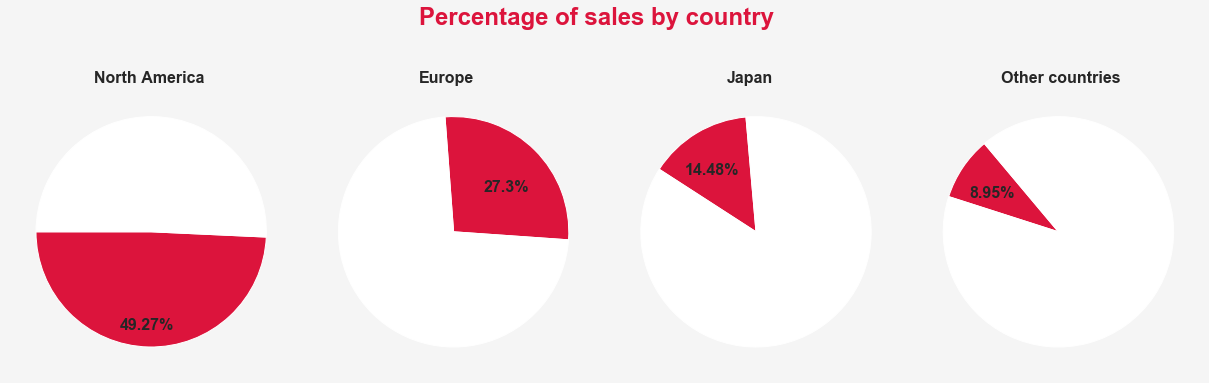

In [66]:
fig = plt.figure(facecolor='whitesmoke')

axes1 = fig.add_axes([0, 0, 1, 1])
axes2 = fig.add_axes([0.7, 0, 1, 1])
axes3 = fig.add_axes([1.4, 0, 1, 1])
axes4 = fig.add_axes([2.1, 0, 1, 1])

axes1.pie([total_sales['Percentages'][0], 100-total_sales['Percentages'][0]], startangle=180,
         colors=['crimson', 'white'])
axes1.text(-0.27, -0.85,f"{round(total_sales['Percentages'][0],2)}%", fontweight='bold', fontsize=16)
axes1.text(-0.5, 1.3, 'North America', fontweight='bold', fontsize=16)

axes2.pie([total_sales['Percentages'][1], 100-total_sales['Percentages'][1]], startangle=-4,
         colors=['crimson', 'white'])
axes2.text(0.26, 0.355, f"{round(total_sales['Percentages'][1],2)}%", fontweight='bold', fontsize=16)
axes2.text(-0.3, 1.3, 'Europe', fontweight='bold', fontsize=16)

axes3.pie([total_sales['Percentages'][2], 100-total_sales['Percentages'][2]], startangle=95,
         colors=['crimson', 'white'])
axes3.text(-0.62, 0.5, f"{round(total_sales['Percentages'][2],2)}%", fontweight='bold', fontsize=16)
axes3.text(-0.25, 1.3, 'Japan', fontweight='bold', fontsize=16)

axes4.pie([total_sales['Percentages'][3], 100-total_sales['Percentages'][3]], startangle=130,
         colors=['crimson', 'white'])
axes4.text(-0.77, 0.3, f"{round(total_sales['Percentages'][3],2)}%", fontweight='bold', fontsize=16)
axes4.text(-0.5, 1.3, 'Other countries', fontweight='bold', fontsize=16)

axes2.text(-0.3,1.8, 'Percentage of sales by country', fontweight='bold', color='crimson', fontsize=24)
fig.show()

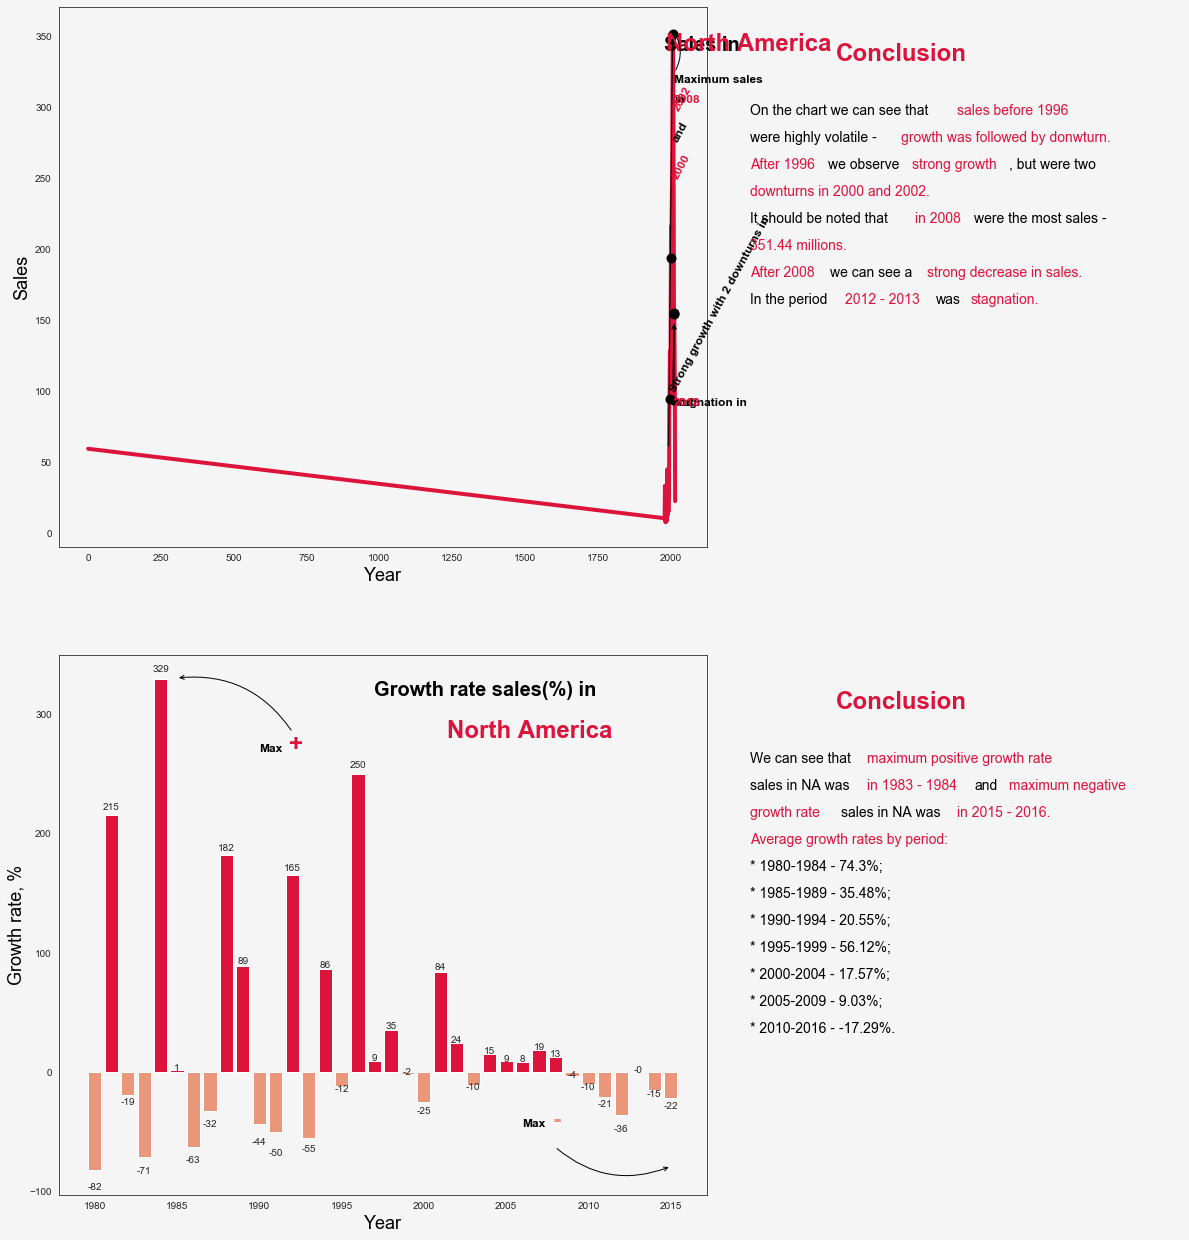

In [67]:
sales_by_year = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()

fig = plt.figure(facecolor='whitesmoke', figsize=(6,5))
sns.set_style('white')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 
axes3 = fig.add_axes([0, -1.8, 1.5, 1.5])
axes4 = fig.add_axes([1.6, -1.8, 1, 1.5]) 

# figure
sns.lineplot(x=sales_by_year['Year'], y=sales_by_year['NA_Sales'],color='crimson',lw=4, ax=axes1)
axes1.scatter(x=[2000, 2003, 2012, 2013, 2008], y=[94.49, 193.59, 154.93, 154.77, 351.44], color='black', lw=4, zorder=3)
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Year', fontsize=18, color='black')
axes1.set_ylabel('Sales', fontsize=18, color='black')
axes1.text(1979, 340, 'Sales in', color='black', fontsize=20, fontweight='bold')
axes1.text(1985, 340, 'North America', color='crimson', fontsize=24, fontweight='bold')

# growth
axes1.annotate('', xy=(2006.9, 350), xytext=(1993.6, 60),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('Strong growth with 2 downturns in', xy=(1993.6, 100), xytext=(1993.6, 100), rotation=61.5, color='black', fontweight='bold', fontsize=12)
axes1.annotate('2000', xy=(2000.6, 250), xytext=(2000.6, 250), rotation=61.5, color='crimson', fontweight='bold', fontsize=12)
axes1.annotate('and', xy=(2001.8, 276), xytext=(2001.8, 276), rotation=61.5, color='black', fontweight='bold', fontsize=12)
axes1.annotate('2002', xy=(2002.8, 298), xytext=(2002.8, 298), rotation=61.5, color='crimson', fontweight='bold', fontsize=12)


# stagnation
axes1.annotate('', xy=(2012, 149), xytext=(2008, 100),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('', xy=(2013, 149), xytext=(2012, 100),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('Stagnation in', xy=(2000.5, 90), xytext=(2000.5, 90), color='black', fontweight='bold', fontsize=12)
axes1.annotate('2012', xy=(2006.3, 90), xytext=(2006.3, 90),color='crimson', fontweight='bold', fontsize=12)
axes1.annotate('and', xy=(2008.5, 90), xytext=(2008.5, 90),color='black', fontweight='bold', fontsize=12)
axes1.annotate('2013', xy=(2010.3, 90), xytext=(2010.3, 90),color='crimson', fontweight='bold', fontsize=12)

# max
axes1.annotate('', xy=(2009, 353.8), xytext=(2015, 325),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
axes1.annotate('Maximum sales', xy=(2009, 353.8), xytext=(2011, 317.5), color='black', fontweight='bold', fontsize=12)
axes1.annotate('in', xy=(2011, 303.5), xytext=(2011, 303.5), color='black', fontweight='bold', fontsize=12)
axes1.annotate('2008', xy=(2012, 303.5), xytext=(2012, 303.5), color='crimson', fontweight='bold', fontsize=12)

# conclusion № 1
axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'On the chart we can see that', color='black', fontsize=14)
axes2.text(0.48, 0.8, 'sales before 1996', color='crimson', fontsize=14)
axes2.text(0, 0.75, 'were highly volatile -', color='black', fontsize=14)
axes2.text(0.35, 0.75, 'growth was followed by donwturn.', color='crimson', fontsize=14)
axes2.text(0, 0.7, 'After 1996', color='crimson', fontsize=14)
axes2.text(0.18, 0.7, 'we observe', color='black', fontsize=14)
axes2.text(0.375, 0.7, 'strong growth', color='crimson', fontsize=14)
axes2.text(0.6, 0.7, ', but were two ', color='black', fontsize=14)
axes2.text(0, 0.65, 'downturns in 2000 and 2002.', color='crimson', fontsize=14)
axes2.text(0, 0.6, 'It should be noted that', color='black', fontsize=14)
axes2.text(0.383, 0.6, 'in 2008', color='crimson', fontsize=14)
axes2.text(0.518, 0.6, 'were the most sales -', color='black', fontsize=14)
axes2.text(0, 0.55, '351.44 millions.', color='crimson', fontsize=14)
axes2.text(0, 0.5, 'After 2008', color='crimson', fontsize=14)
axes2.text(0.185, 0.5, 'we can see a', color='black', fontsize=14)
axes2.text(0.41, 0.5, 'strong decrease in sales.', color='crimson', fontsize=14)
axes2.text(0, 0.45, 'In the period', color='black', fontsize=14)
axes2.text(0.22, 0.45, '2012 - 2013', color='crimson', fontsize=14)
axes2.text(0.43, 0.45, 'was', color='black', fontsize=14)
axes2.text(0.51, 0.45, 'stagnation.', color='crimson', fontsize=14)

# calculation of sales growth rates
list_NA = []
for n in range(1, 37):
    d = ((sales_by_year['NA_Sales'][n] - sales_by_year['NA_Sales'][n-1])/sales_by_year['NA_Sales'][n-1])*100
    list_NA.append(d)

# visualisation growth rates sales in NA by years
colors = ['crimson' if _ > 0 else 'darksalmon' for _ in list_NA]
axes3.bar(height=list_NA, x=sales_by_year['Year'][range(1, 37)], color=colors)
for p in axes3.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height >= 0:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
    elif height <= -55:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.2), ha='center')
    else:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.4), ha='center')
axes3.set_facecolor('whitesmoke')
axes3.set_xlabel('Year', fontsize=18, color='black')
axes3.set_ylabel('Growth rate, %', fontsize=18, color='black')
axes3.text(1997, 315, 'Growth rate sales(%) in', color='black', fontsize=20, fontweight='bold')
axes3.text(2001.39, 280, 'North America', color='crimson', fontsize=24, fontweight='bold')

# max +
axes3.annotate('', xy=(1985, 330), xytext=(1992, 285),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
axes3.annotate('Max', xy=(1990, 268), xytext=(1990, 268), color='black', fontweight='bold', fontsize=12)
axes3.annotate('+', xy=(1991.8, 268), xytext=(1991.8, 268), color='crimson', fontweight='bold', fontsize=24)

# max -
axes3.annotate('', xy=(2015, -79), xytext=(2008, -63),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
axes3.annotate('Max', xy=(2006, -46), xytext=(2006, -46), color='black', fontweight='bold', fontsize=12)
axes3.annotate('-', xy=(2007.8, -46), xytext=(2007.8, -46), color='darksalmon', fontweight='bold', fontsize=24)

# conclusion № 2
axes4.set_facecolor('whitesmoke')
axes4.axis('off')
axes4.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes4.text(0, 0.8, 'We can see that', color='black', fontsize=14)
axes4.text(0.27, 0.8, 'maximum positive growth rate', color='crimson', fontsize=14)
axes4.text(0, 0.75, 'sales in NA was', color='black', fontsize=14)
axes4.text(0.27, 0.75, 'in 1983 - 1984', color='crimson', fontsize=14)
axes4.text(0.52, 0.75, 'and', color='black', fontsize=14)
axes4.text(0.6, 0.75, 'maximum negative', color='crimson', fontsize=14)
axes4.text(0, 0.70, 'growth rate', color='crimson', fontsize=14)
axes4.text(0.21, 0.70, 'sales in NA was', color='black', fontsize=14)
axes4.text(0.48, 0.70, 'in 2015 - 2016.', color='crimson', fontsize=14)
axes4.text(0, 0.65, 'Average growth rates by period:', color='crimson', fontsize=14)
axes4.text(0, 0.60, f'* 1980-1984 - {round(statistics.mean(list_NA[:5]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.55, f'* 1985-1989 - {round(statistics.mean(list_NA[5:10]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.50, f'* 1990-1994 - {round(statistics.mean(list_NA[10:15]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.45, f'* 1995-1999 - {round(statistics.mean(list_NA[15:20]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.40, f'* 2000-2004 - {round(statistics.mean(list_NA[20:25]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.35, f'* 2005-2009 - {round(statistics.mean(list_NA[25:30]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.30, f'* 2010-2016 - {round(statistics.mean(list_NA[30:]),2)}%.', color='black', fontsize=14)
fig.show()

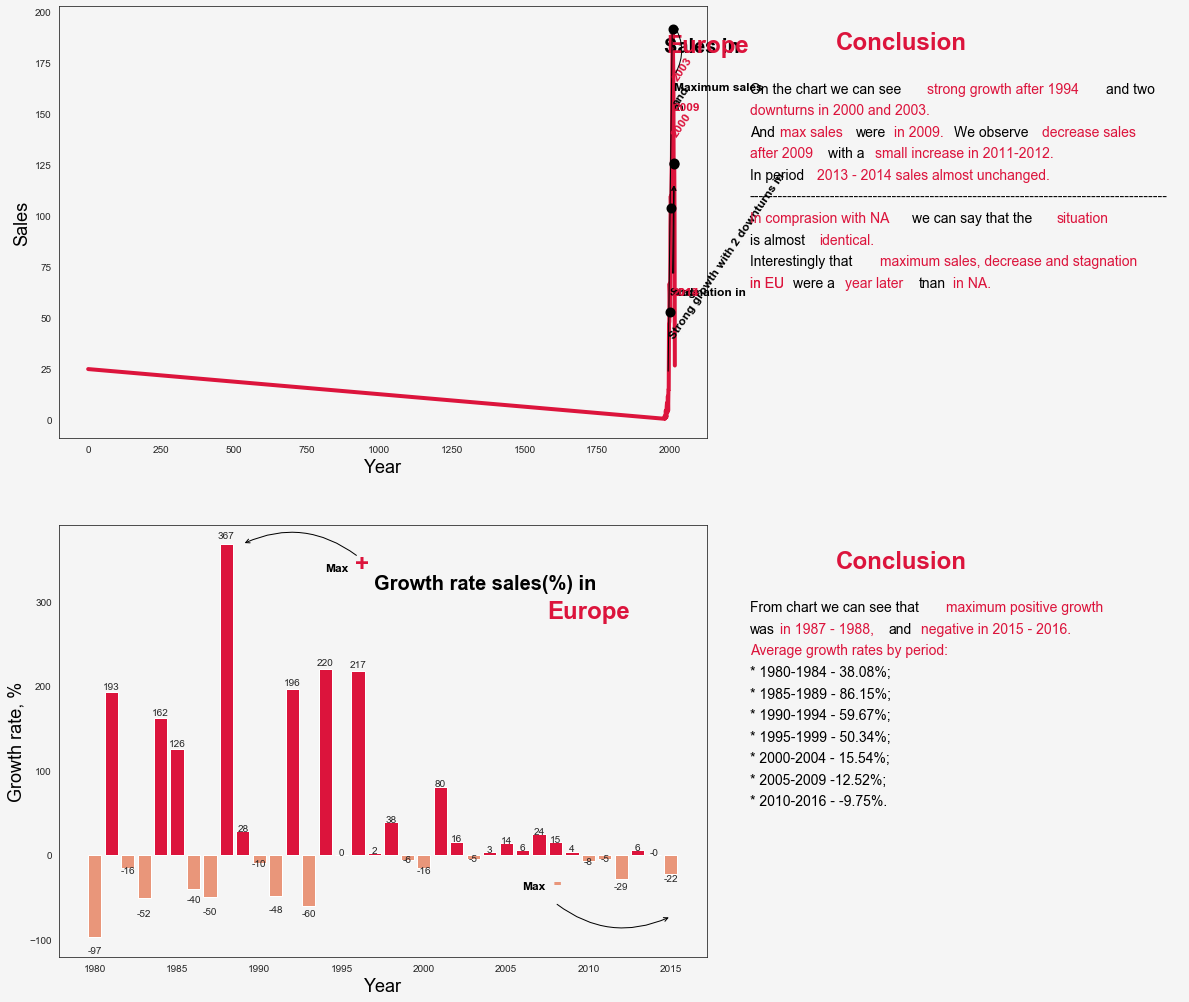

In [68]:
fig = plt.figure(facecolor='whitesmoke')
sns.set_style('white')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 
axes3 = fig.add_axes([0, -1.8, 1.5, 1.5]) 
axes4 = fig.add_axes([1.6, -1.8, 1, 1.5]) 

sns.lineplot(x=sales_by_year['Year'], y=sales_by_year['EU_Sales'],color='crimson',lw=4, ax=axes1)
axes1.scatter(x=[2000, 2003, 2009, 2013, 2014], y=[52.75, 103.81, 191.59, 125.80, 125.63], color='black', lw=4, zorder=3)
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Year', color='black', fontsize=18)
axes1.set_ylabel('Sales', color='black', fontsize=18)
axes1.text(1979, 180, 'Sales in', color='black', fontsize=20, fontweight='bold')
axes1.text(1985, 180, 'Europe', color='crimson', fontsize=24, fontweight='bold')

# growth
axes1.annotate('', xy=(2007, 193), xytext=(1993, 23),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('Strong growth with 2 downturns in', xy=(1992.4, 40), xytext=(1992.4, 40), rotation=56, color='black', fontweight='bold', fontsize=12)
axes1.annotate('2000', xy=(2000.7, 139.1), xytext=(2000.7, 139.1), rotation=56, color='crimson', fontweight='bold', fontsize=12)
axes1.annotate('and', xy=(2001.9, 154.2), xytext=(2001.9, 154.2), rotation=56, color='black', fontweight='bold', fontsize=12)
axes1.annotate('2003', xy=(2003, 166.7), xytext=(2003, 166.7), rotation=56, color='crimson', fontweight='bold', fontsize=12)

# stagnation
axes1.annotate('', xy=(2012.4, 116), xytext=(2008, 71),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('', xy=(2013.4, 116), xytext=(2012, 71),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('Stagnation in', xy=(2000.5, 61), xytext=(2000.5, 61), color='black', fontweight='bold', fontsize=12)
axes1.annotate('2013', xy=(2006.3, 61), xytext=(2006.3, 61),color='crimson', fontweight='bold', fontsize=12)
axes1.annotate('and', xy=(2008.5, 61), xytext=(2008.5, 61),color='black', fontweight='bold', fontsize=12)
axes1.annotate('2014', xy=(2010.3, 61), xytext=(2010.3, 61),color='crimson', fontweight='bold', fontsize=12)

# max
axes1.annotate('', xy=(2010, 194), xytext=(2016, 169.2),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
axes1.annotate('Maximum sales', xy=(2011.5, 161.7), xytext=(2011.5, 161.7), color='black', fontweight='bold', fontsize=12)
axes1.annotate('in', xy=(2011.5, 152), xytext=(2011.5, 152), color='black', fontweight='bold', fontsize=12)
axes1.annotate('2009', xy=(2012.5, 152), xytext=(2012.5, 152), color='crimson', fontweight='bold', fontsize=12)

# conclusion № 1
axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'On the chart we can see', color='black', fontsize=14)
axes2.text(0.41, 0.8, 'strong growth after 1994', color='crimson', fontsize=14)
axes2.text(0.825, 0.8, 'and two', color='black', fontsize=14)
axes2.text(0, 0.75, 'downturns in 2000 and 2003.', color='crimson', fontsize=14)
axes2.text(0, 0.7, 'And', color='black', fontsize=14)
axes2.text(0.07, 0.7, 'max sales', color='crimson', fontsize=14)
axes2.text(0.245, 0.7, 'were', color='black', fontsize=14)
axes2.text(0.333, 0.7, 'in 2009.', color='crimson', fontsize=14)
axes2.text(0.472, 0.7, 'We observe', color='black', fontsize=14)
axes2.text(0.675, 0.7, 'decrease sales', color='crimson', fontsize=14)
axes2.text(0, 0.65, 'after 2009', color='crimson', fontsize=14)
axes2.text(0.18, 0.65, 'with a', color='black', fontsize=14)
axes2.text(0.29, 0.65, 'small increase in 2011-2012.', color='crimson', fontsize=14)
axes2.text(0, 0.6, 'In period', color='black', fontsize=14)
axes2.text(0.155, 0.6, '2013 - 2014 sales almost unchanged.', color='crimson', fontsize=14)
axes2.text(0, 0.55, '----------------------------------------------------------------------------------------', color='black', fontsize=14)
axes2.text(0, 0.50, 'In comprasion with NA', color='crimson', fontsize=14)
axes2.text(0.375, 0.50, 'we can say that the', color='black', fontsize=14)
axes2.text(0.71, 0.50, 'situation', color='crimson', fontsize=14)
axes2.text(0, 0.45, 'is almost', color='black', fontsize=14)
axes2.text(0.16, 0.45, 'identical.', color='crimson', fontsize=14)
axes2.text(0, 0.4, 'Interestingly that', color='black', fontsize=14)
axes2.text(0.3, 0.4, 'maximum sales, decrease and stagnation', color='crimson', fontsize=14)
axes2.text(0, 0.35, 'in EU', color='crimson', fontsize=14)
axes2.text(0, 0.35, 'in EU', color='crimson', fontsize=14)
axes2.text(0.1, 0.35, 'were a', color='black', fontsize=14)
axes2.text(0.22, 0.35, 'year later', color='crimson', fontsize=14)
axes2.text(0.39, 0.35, 'tnan', color='black', fontsize=14)
axes2.text(0.47, 0.35, 'in NA.', color='crimson', fontsize=14)
fig.show()

# calculation of sales growth rates
list_EU = []
for n in range(1, 37):
    d = ((sales_by_year['EU_Sales'][n] - sales_by_year['EU_Sales'][n-1])/sales_by_year['EU_Sales'][n-1])*100
    list_EU.append(d)

# visualisation growth rates sales in EU by years
colors = ['crimson' if _ > 0 else 'darksalmon' for _ in list_EU]
axes3.bar(height=list_EU, x=sales_by_year['Year'][range(1, 37)], color=colors)
for p in axes3.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height >= 0:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
    elif height <= -55:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.2), ha='center')
    else:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.4), ha='center')
axes3.set_facecolor('whitesmoke')
axes3.set_xlabel('Year', fontsize=18, color='black')
axes3.set_ylabel('Growth rate, %', fontsize=18, color='black')
axes3.text(1997, 315, 'Growth rate sales(%) in', color='black', fontsize=20, fontweight='bold')
axes3.text(2007.48, 280, 'Europe', color='crimson', fontsize=24, fontweight='bold')

# max +
axes3.annotate('', xy=(1989, 368), xytext=(1996, 353),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
axes3.annotate('Max', xy=(1994, 336), xytext=(1994, 336), color='black', fontweight='bold', fontsize=12)
axes3.annotate('+', xy=(1995.8, 336), xytext=(1995.8, 336), color='crimson', fontweight='bold', fontsize=24)

# max -
axes3.annotate('', xy=(2015, -73), xytext=(2008, -57),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
axes3.annotate('Max', xy=(2006, -40), xytext=(2006, -40), color='black', fontweight='bold', fontsize=12)
axes3.annotate('-', xy=(2007.8, -40), xytext=(2007.8, -40), color='darksalmon', fontweight='bold', fontsize=24)

# conclusion № 2
axes4.set_facecolor('whitesmoke')
axes4.axis('off')
axes4.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes4.text(0, 0.8, 'From chart we can see that', color='black', fontsize=14)
axes4.text(0.455, 0.8, 'maximum positive growth', color='crimson', fontsize=14)
axes4.text(0, 0.75, 'was', color='black', fontsize=14)
axes4.text(0.07, 0.75, 'in 1987 - 1988,', color='crimson', fontsize=14)
axes4.text(0.32, 0.75, 'and', color='black', fontsize=14)
axes4.text(0.395, 0.75, 'negative in 2015 - 2016.', color='crimson', fontsize=14)
axes4.text(0, 0.7, 'Average growth rates by period:', color='crimson', fontsize=14)
axes4.text(0, 0.65, f'* 1980-1984 - {round(statistics.mean(list_EU[:5]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.6, f'* 1985-1989 - {round(statistics.mean(list_EU[5:10]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.55, f'* 1990-1994 - {round(statistics.mean(list_EU[10:15]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.5, f'* 1995-1999 - {round(statistics.mean(list_EU[15:20]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.45, f'* 2000-2004 - {round(statistics.mean(list_EU[20:25]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.4, f'* 2005-2009 -{round(statistics.mean(list_EU[25:30]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.35, f'* 2010-2016 - {round(statistics.mean(list_EU[30:]),2)}%.', color='black', fontsize=14)
fig.show()

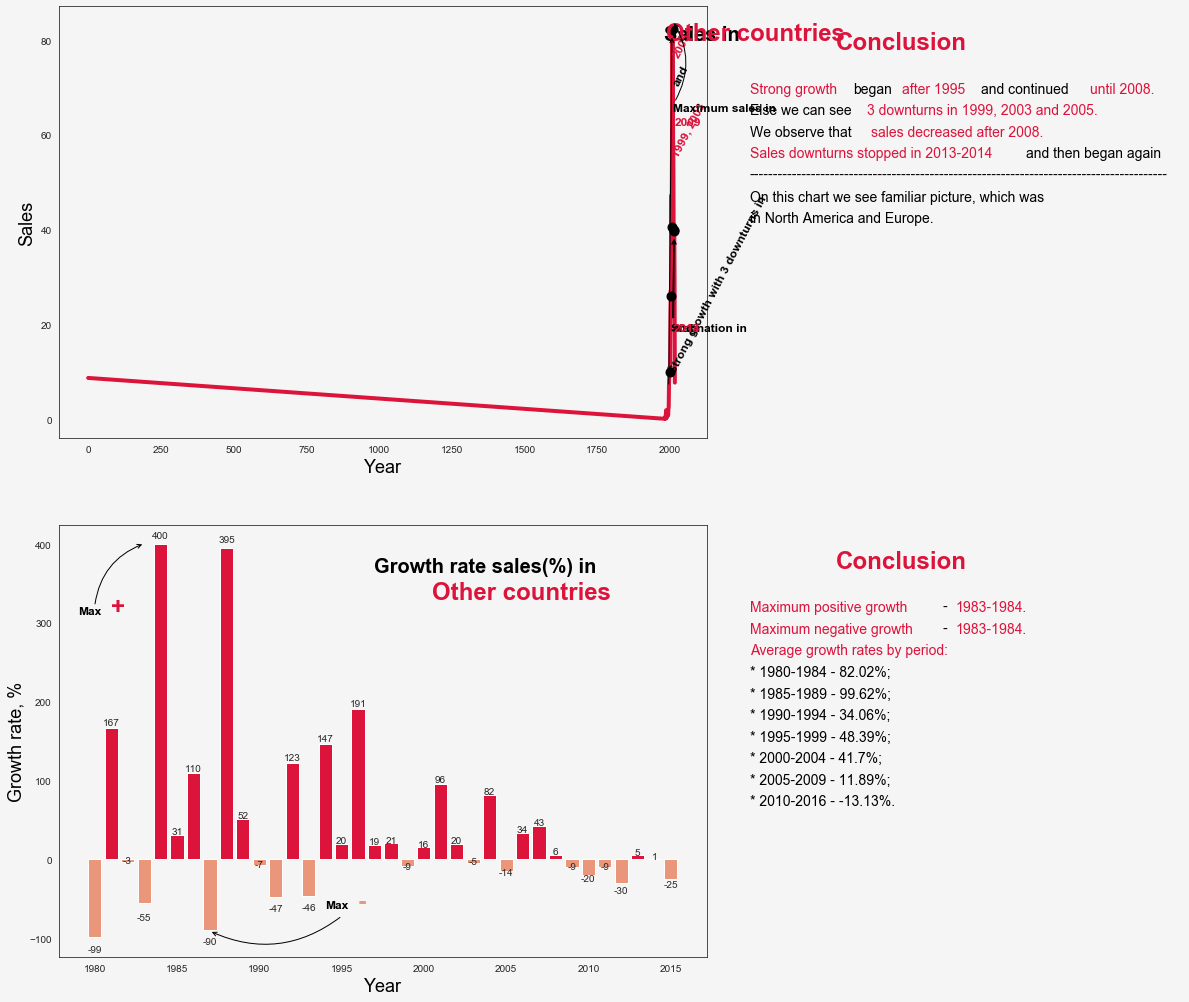

In [69]:
fig = plt.figure(facecolor='whitesmoke')
sns.set_style('white')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 
axes3 = fig.add_axes([0, -1.8, 1.5, 1.5]) 
axes4 = fig.add_axes([1.6, -1.8, 1, 1.5]) 

sns.lineplot(x=sales_by_year['Year'], y=sales_by_year['Other_Sales'],color='crimson',lw=4, ax=axes1)
axes1.scatter(x=[1999, 2003, 2005, 2008, 2013, 2014], y=[10.05, 26.01, 40.55, 82.39, 39.82, 40.02], color='black', lw=4, zorder=3)
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Year', color='black', fontsize=18)
axes1.set_ylabel('Sales', color='black', fontsize=18)
axes1.text(1979, 80, 'Sales in', color='black', fontsize=20, fontweight='bold')
axes1.text(1985, 80, 'Other countries', color='crimson', fontsize=24, fontweight='bold')

# growth
axes1.annotate('', xy=(2006, 81), xytext=(1995, 7),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('Strong growth with 3 downturns in', xy=(1994.1, 10), xytext=(1994.1, 10), rotation=62.5, color='black', fontweight='bold', fontsize=12)
axes1.annotate('1999, 2003', xy=(2001, 55.5), xytext=(2001, 55.5), rotation=62.5, color='crimson', fontweight='bold', fontsize=12)
axes1.annotate('and', xy=(2003.2, 70.6), xytext=(2003.2, 70.6), rotation=62.5, color='black', fontweight='bold', fontsize=12)
axes1.annotate('2005', xy=(2004, 76.4), xytext=(2004, 76.4), rotation=62.5, color='crimson', fontweight='bold', fontsize=12)

# stagnation
axes1.annotate('', xy=(2012.9, 38.5), xytext=(2008, 21),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('', xy=(2013.9, 38.5), xytext=(2012, 21),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('Stagnation in', xy=(2001.5, 18.5), xytext=(2001.5, 18.5), color='black', fontweight='bold', fontsize=12)
axes1.annotate('2013', xy=(2007.35, 18.5), xytext=(2007.35, 18.5),color='crimson', fontweight='bold', fontsize=12)
axes1.annotate('and', xy=(2009.5, 18.5), xytext=(2009.5, 18.5),color='black', fontweight='bold', fontsize=12)
axes1.annotate('2014', xy=(2011.2, 18.5), xytext=(2011.2, 18.5),color='crimson', fontweight='bold', fontsize=12)

# max
axes1.annotate('', xy=(2009, 84), xytext=(2015, 67),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
axes1.annotate('Maximum sales in', xy=(2009.8, 65), xytext=(2009.8, 65), color='black', fontweight='bold', fontsize=12)
axes1.annotate('2009', xy=(2015.2, 62), xytext=(2015.2, 62), color='crimson', fontweight='bold', fontsize=12)

# conclusion № 1
axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'Strong growth', color='crimson', fontsize=14)
axes2.text(0.24, 0.8, 'began', color='black', fontsize=14)
axes2.text(0.353, 0.8, 'after 1995', color='crimson', fontsize=14)
axes2.text(0.535, 0.8, 'and continued', color='black', fontsize=14)
axes2.text(0.787, 0.8, 'until 2008.', color='crimson', fontsize=14)
axes2.text(0, 0.75, 'Else we can see', color='black', fontsize=14)
axes2.text(0.27, 0.75, '3 downturns in 1999, 2003 and 2005.', color='crimson', fontsize=14)
axes2.text(0, 0.7, 'We observe that', color='black', fontsize=14)
axes2.text(0.28, 0.7, 'sales decreased after 2008.', color='crimson', fontsize=14)
axes2.text(0, 0.65, 'Sales downturns stopped in 2013-2014', color='crimson', fontsize=14)
axes2.text(0.64, 0.65, 'and then began again', color='black', fontsize=14)
axes2.text(0, 0.6, '----------------------------------------------------------------------------------------', color='black', fontsize=14)
axes2.text(0, 0.55, 'On this chart we see familiar picture, which was', color='black', fontsize=14)
axes2.text(0, 0.50, 'in North America and Europe.', color='black', fontsize=14)


# calculation of sales growth rates
list_Other = []
for n in range(1, 37):
    d = ((sales_by_year['Other_Sales'][n] - sales_by_year['Other_Sales'][n-1])/sales_by_year['Other_Sales'][n-1])*100
    list_Other.append(d)

# visualisation growth rates sales in Other by years
colors = ['crimson' if _ > 0 else 'darksalmon' for _ in list_Other]
axes3.bar(height=list_Other, x=sales_by_year['Year'][range(1, 37)], color=colors)
for p in axes3.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height >= 0:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
    elif height <= -55:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.2), ha='center')
    else:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.4), ha='center')
axes3.set_facecolor('whitesmoke')
axes3.set_xlabel('Year', fontsize=18, color='black')
axes3.set_ylabel('Growth rate, %', fontsize=18, color='black')
axes3.text(1997, 365, 'Growth rate sales(%) in', color='black', fontsize=20, fontweight='bold')
axes3.text(2000.5, 330, 'Other countries', color='crimson', fontsize=24, fontweight='bold')

# max +
axes3.annotate('', xy=(1983, 401), xytext=(1980, 322),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=-.3'))
axes3.annotate('Max', xy=(1979, 312), xytext=(1979, 312), color='black', fontweight='bold', fontsize=12)
axes3.annotate('+', xy=(1981, 312), xytext=(1981, 312), color='crimson', fontweight='bold', fontsize=24)

# max -
axes3.annotate('', xy=(1987, -91), xytext=(1995, -72),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=-.3'))
axes3.annotate('Max', xy=(1994, -62), xytext=(1994, -62), color='black', fontweight='bold', fontsize=12)
axes3.annotate('-', xy=(1996, -62), xytext=(1996, -62), color='darksalmon', fontweight='bold', fontsize=24)

# conclusion № 2
axes4.set_facecolor('whitesmoke')
axes4.axis('off')
axes4.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes4.text(0, 0.8, 'Maximum positive growth', color='crimson', fontsize=14)
axes4.text(0.445, 0.8, '-', color='black', fontsize=14)
axes4.text(0.475, 0.8, '1983-1984.', color='crimson', fontsize=14)
axes4.text(0.0, 0.75, 'Maximum negative growth', color='crimson', fontsize=14)
axes4.text(0.445, 0.75, '-', color='black', fontsize=14)
axes4.text(0.475, 0.75, '1983-1984.', color='crimson', fontsize=14)
axes4.text(0, 0.7, 'Average growth rates by period:', color='crimson', fontsize=14)
axes4.text(0, 0.65, f'* 1980-1984 - {round(statistics.mean(list_Other[:5]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.6, f'* 1985-1989 - {round(statistics.mean(list_Other[5:10]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.55, f'* 1990-1994 - {round(statistics.mean(list_Other[10:15]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.5, f'* 1995-1999 - {round(statistics.mean(list_Other[15:20]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.45, f'* 2000-2004 - {round(statistics.mean(list_Other[20:25]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.4, f'* 2005-2009 - {round(statistics.mean(list_Other[25:30]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.35, f'* 2010-2016 - {round(statistics.mean(list_Other[30:]),2)}%.', color='black', fontsize=14)
fig.show()

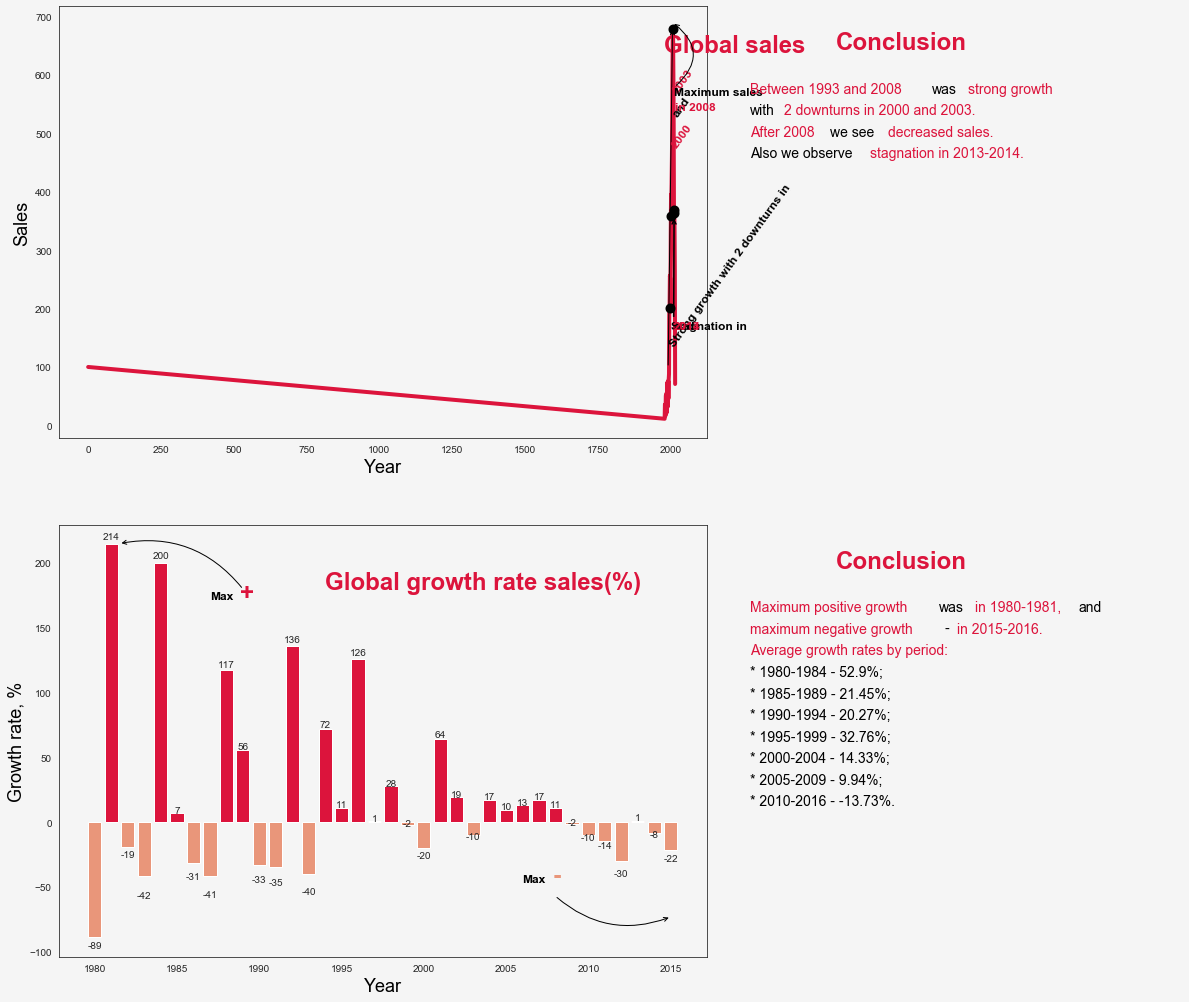

In [70]:
fig = plt.figure(facecolor='whitesmoke')
sns.set_style('white')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 
axes3 = fig.add_axes([0, -1.8, 1.5, 1.5]) 
axes4 = fig.add_axes([1.6, -1.8, 1, 1.5]) 

sns.lineplot(x=sales_by_year['Year'], y=sales_by_year['Global_Sales'],color='crimson',lw=4, ax=axes1)
axes1.scatter(x=[2000, 2003, 2008, 2012, 2013], y=[ 201.56, 357.85, 678.90, 363.53, 368.11], color='black', lw=4, zorder=3)
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Year', fontsize=18, color='black')
axes1.set_ylabel('Sales', fontsize=18, color='black')
axes1.text(1979, 640, 'Global sales', color='crimson', fontsize=24, fontweight='bold')

# growth
axes1.annotate('', xy=(2007, 681), xytext=(1992, 100),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('Strong growth with 2 downturns in', xy=(1991.2, 135), xytext=(1991.2, 135), rotation=54, color='black', fontweight='bold', fontsize=12)
axes1.annotate('2000', xy=(2000, 476), xytext=(2000, 476), rotation=54, color='crimson', fontweight='bold', fontsize=12)
axes1.annotate('and', xy=(2001.3, 529), xytext=(2001.3, 529), rotation=54, color='black', fontweight='bold', fontsize=12)
axes1.annotate('2003', xy=(2002.3, 570), xytext=(2002.3, 570), rotation=54, color='crimson', fontweight='bold', fontsize=12)

# stagnation
axes1.annotate('', xy=(2011.9, 357), xytext=(2010, 183),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('', xy=(2012.9, 357), xytext=(2012, 183),
              arrowprops=dict(color='black', arrowstyle='->'))
axes1.annotate('Stagnation in', xy=(2001, 165), xytext=(2001, 165), color='black', fontweight='bold', fontsize=12)
axes1.annotate('2013', xy=(2007, 165), xytext=(2007, 165),color='crimson', fontweight='bold', fontsize=12)
axes1.annotate('and', xy=(2009.3, 165), xytext=(2009.3, 165),color='black', fontweight='bold', fontsize=12)
axes1.annotate('2014', xy=(2011.2, 165), xytext=(2011.2, 165),color='crimson', fontweight='bold', fontsize=12)

# # max
axes1.annotate('', xy=(2008, 690), xytext=(2015, 580),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=.6'))
axes1.annotate('Maximum sales', xy=(2011, 565), xytext=(2011, 565), color='black', fontweight='bold', fontsize=12)
axes1.annotate('in 2008', xy=(2014.2, 540), xytext=(2014.2, 540), color='crimson', fontweight='bold', fontsize=12)

# conclusion № 1
axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'Between 1993 and 2008', color='crimson', fontsize=14)
axes2.text(0.422, 0.8, 'was', color='black', fontsize=14)
axes2.text(0.505, 0.8, 'strong growth', color='crimson', fontsize=14)
axes2.text(0, 0.75, 'with', color='black', fontsize=14)
axes2.text(0.08, 0.75, '2 downturns in 2000 and 2003.', color='crimson', fontsize=14)
axes2.text(0, 0.7, 'After 2008', color='crimson', fontsize=14)
axes2.text(0.185, 0.7, 'we see', color='black', fontsize=14)
axes2.text(0.32, 0.7, 'decreased sales.', color='crimson', fontsize=14)
axes2.text(0, 0.65, 'Also we observe', color='black', fontsize=14)
axes2.text(0.278, 0.65, 'stagnation in 2013-2014.', color='crimson', fontsize=14)

# calculation of sales growth rates
list_Global = []
for n in range(1, 37):
    d = ((sales_by_year['Global_Sales'][n] - sales_by_year['Global_Sales'][n-1])/sales_by_year['Global_Sales'][n-1])*100
    list_Global.append(d)

# visualisation growth rates sales in Other by years
colors = ['crimson' if _ > 0 else 'darksalmon' for _ in list_Global]
axes3.bar(height=list_Global, x=sales_by_year['Year'][range(1, 37)], color=colors)
for p in axes3.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height >= 0:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
    elif height <= -55:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.1), ha='center')
    else:
        axes3.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.4), ha='center')
axes3.set_facecolor('whitesmoke')
axes3.set_xlabel('Year', fontsize=18, color='black')
axes3.set_ylabel('Growth rate, %', fontsize=18, color='black')
axes3.text(1994, 180, 'Global growth rate sales(%)', color='crimson', fontsize=24, fontweight='bold')

# max +
axes3.annotate('', xy=(1981.5, 215), xytext=(1989, 180),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
axes3.annotate('Max', xy=(1987, 172), xytext=(1987, 172), color='black', fontweight='bold', fontsize=12)
axes3.annotate('+', xy=(1988.8, 171), xytext=(1988.8, 171), color='crimson', fontweight='bold', fontsize=24)

# max -
axes3.annotate('', xy=(2015, -73), xytext=(2008, -57),
               arrowprops=dict(color='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
axes3.annotate('Max', xy=(2006, -46), xytext=(2006, -46), color='black', fontweight='bold', fontsize=12)
axes3.annotate('-', xy=(2007.8, -46), xytext=(2007.8, -46), color='darksalmon', fontweight='bold', fontsize=24)

# conclusion № 2
axes4.set_facecolor('whitesmoke')
axes4.axis('off')
axes4.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes4.text(0, 0.8, 'Maximum positive growth', color='crimson', fontsize=14)
axes4.text(0.438, 0.8, 'was', color='black', fontsize=14)
axes4.text(0.52, 0.8, 'in 1980-1981,', color='crimson', fontsize=14)
axes4.text(0.76, 0.8, 'and', color='black', fontsize=14)
axes4.text(0, 0.75, 'maximum negative growth', color='crimson', fontsize=14)
axes4.text(0.45, 0.75, '-', color='black', fontsize=14)
axes4.text(0.48, 0.75, 'in 2015-2016.', color='crimson', fontsize=14)
axes4.text(0, 0.7, 'Average growth rates by period:', color='crimson', fontsize=14)
axes4.text(0, 0.65, f'* 1980-1984 - {round(statistics.mean(list_Global[:5]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.6, f'* 1985-1989 - {round(statistics.mean(list_Global[5:10]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.55, f'* 1990-1994 - {round(statistics.mean(list_Global[10:15]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.5, f'* 1995-1999 - {round(statistics.mean(list_Global[15:20]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.45, f'* 2000-2004 - {round(statistics.mean(list_Global[20:25]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.4, f'* 2005-2009 - {round(statistics.mean(list_Global[25:30]),2)}%;', color='black', fontsize=14)
axes4.text(0, 0.35, f'* 2010-2016 - {round(statistics.mean(list_Global[30:]),2)}%.', color='black', fontsize=14)

fig.show()

In [71]:
# NA
group_pub_na = df.groupby('Publisher')['NA_Sales'].sum().reset_index()
group_pub_na['Percentages'] = group_pub_na['NA_Sales']/sum(group_pub_na['NA_Sales'])*100
group_pub_na['Percentages'] = round(group_pub_na['Percentages'],2)
group_pub_na.sort_values(by='Percentages', ascending=False, inplace=True)
percent_top_10_na = round(sum(group_pub_na['Percentages'][:10]), 2)

# EU
group_pub_eu = df.groupby('Publisher')['EU_Sales'].sum().reset_index()
group_pub_eu['Percentages'] = group_pub_eu['EU_Sales']/sum(group_pub_eu['EU_Sales'])*100
group_pub_eu['Percentages'] = round(group_pub_eu['Percentages'],2)
group_pub_eu.sort_values(by='Percentages', ascending=False, inplace=True)
percent_top_10_eu = round(sum(group_pub_eu['Percentages'][:10]), 2)

# JP
group_pub_jp = df.groupby('Publisher')['JP_Sales'].sum().reset_index()
group_pub_jp['Percentages'] = group_pub_jp['JP_Sales']/sum(group_pub_jp['JP_Sales'])*100
group_pub_jp['Percentages'] = round(group_pub_jp['Percentages'],2)
group_pub_jp.sort_values(by='Percentages', ascending=False, inplace=True)
percent_top_10_jp = round(sum(group_pub_jp['Percentages'][:10]), 2)

# Other
group_pub_other = df.groupby('Publisher')['Other_Sales'].sum().reset_index()
group_pub_other['Percentages'] = group_pub_other['Other_Sales']/sum(group_pub_other['Other_Sales'])*100
group_pub_other['Percentages'] = round(group_pub_other['Percentages'],2)
group_pub_other.sort_values(by='Percentages', ascending=False, inplace=True)
percent_top_10_other = round(sum(group_pub_other['Percentages'][:10]), 2)

# Global
group_pub_global = df.groupby('Publisher')['Global_Sales'].sum().reset_index()
group_pub_global['Percentages'] = group_pub_global['Global_Sales']/sum(group_pub_global['Global_Sales'])*100
group_pub_global['Percentages'] = round(group_pub_global['Percentages'],2)
group_pub_global.sort_values(by='Percentages', ascending=False, inplace=True)
percent_top_10_global = round(sum(group_pub_global['Percentages'][:10]), 2)

percent_top_10 = pd.DataFrame({'Countries':['North America', 'Europe', 'Japan', 'Other', 'Global'],
                              'Percentages':[percent_top_10_na, percent_top_10_eu, percent_top_10_jp,
                                            percent_top_10_other, percent_top_10_global]})
percent_top_10 

,Countries,Percentages
0,North America,72.04
1,Europe,73.51
2,Japan,79.36
3,Other,74.19
4,Global,70.15


TypeError: unhashable type: 'list'

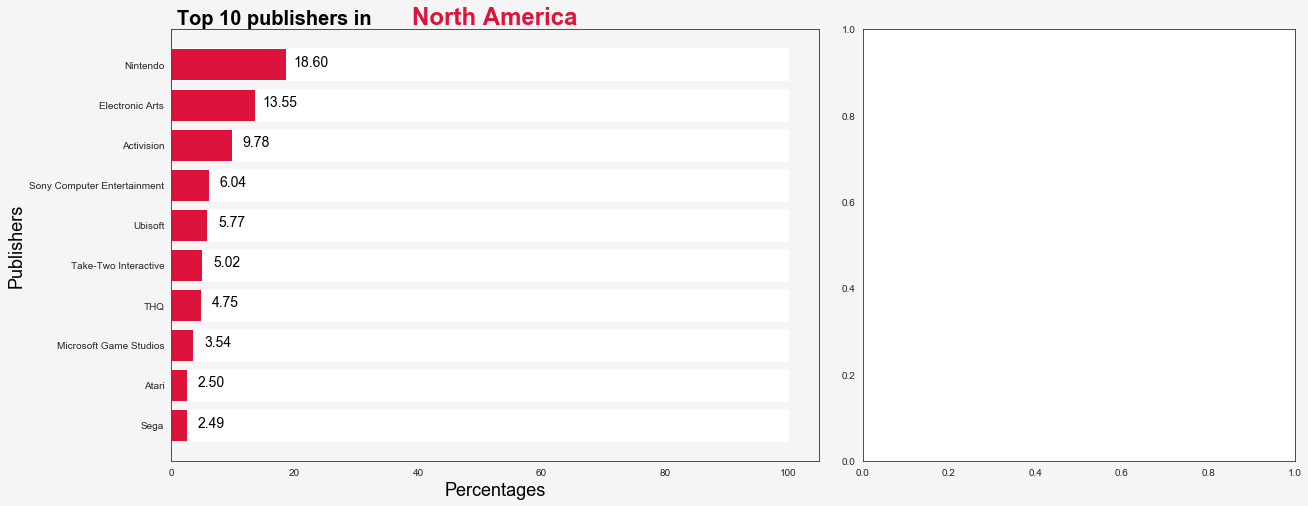

In [72]:
top_10_group_pub_na = group_pub_na.head(10)
top_10_group_pub_na.sort_values(by='Percentages', inplace=True)
top_10_group_pub_na['Total'] = 100

fig = plt.figure(facecolor='whitesmoke')
sns.set_style('white')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 

axes1.barh(width=top_10_group_pub_na['Total'], y=top_10_group_pub_na['Publisher'], color='white')
axes1.barh(width=top_10_group_pub_na['Percentages'], y=top_10_group_pub_na['Publisher'], color='crimson')
axes1.text(1, 10, 'Top 10 publishers in', color='black', fontsize=20, fontweight='bold')
axes1.text(39, 10, 'North America', color='crimson', fontsize=24, fontweight='bold')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Percentages', fontsize=18, color='black')
axes1.set_ylabel('Publishers', fontsize=18, color='black')

for p in axes1.patches[10:]:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes1.annotate('{:.2f}'.format(width), (4+ width, y + height*0.45), ha='center', fontsize=14, color='black')

axes1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'Chart shows', color='black', fontsize=14)
axes2.text(0.21, 0.8, 'percentage of sales', color='crimson', fontsize=14)
axes2.text(0.54, 0.8, 'of the ', color='black', fontsize=14)
axes2.text(0.65, 0.8, 'top 10 publishers.', color='crimson', fontsize=14)
axes2.text(0, 0.75, 'About top 3:', color='crimson', fontsize=14)
axes2.text(0, 0.7, 'Nintendo', color='crimson', fontsize=14)
axes2.text(0.15, 0.7, ' - Japanese multinational consumer electronics and', color='black', fontsize=14)
axes2.text(0, 0.65, 'video game company headquartered in Kyoto. The company', color='black', fontsize=14)
axes2.text(0, 0.6, 'was founded in 1889 as Nintendo Karuta.', color='black', fontsize=14)
axes2.text(0, 0.55, 'Electronics Arts', color='crimson', fontsize=14)
axes2.text(0.25, 0.55, ' - American video game company headquartered', color='black', fontsize=14)
axes2.text(0, 0.5, 'in California.  Founded and incorporated on May 27, 1982,', color='black', fontsize=14)
axes2.text(0, 0.45, 'by Apple employee Trip Hawkins.', color='black', fontsize=14)
axes2.text(0, 0.4, 'Activision', color='crimson', fontsize=14)
axes2.text(0.15, 0.4, ' - American video game publisher based in California.', color='black', fontsize=14)
axes2.text(0, 0.35, 'The company was founded as Activision, Inc. in October 1979', color='black', fontsize=14)
axes2.text(0, 0.3, 'by former Atari game developers.', color='black', fontsize=14)
fig.show()

TypeError: unhashable type: 'list'

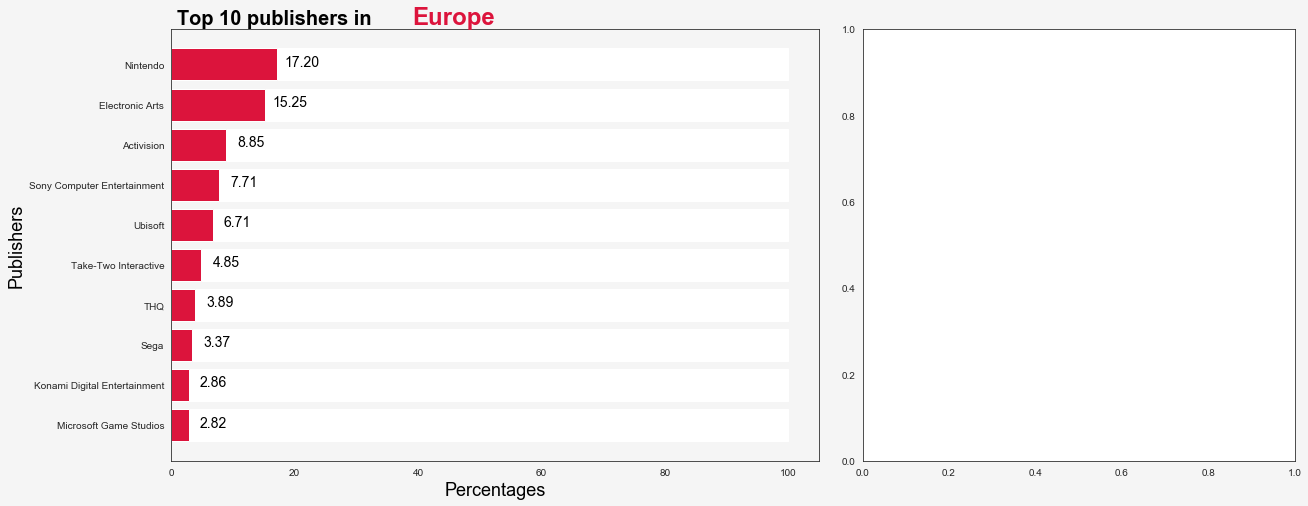

In [73]:
top_10_group_pub_eu = group_pub_eu.head(10)
top_10_group_pub_eu.sort_values(by='Percentages', inplace=True)
top_10_group_pub_eu['Total'] = 100

fig = plt.figure(facecolor='whitesmoke')
sns.set_style('white')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 

axes1.barh(width=top_10_group_pub_eu['Total'], y=top_10_group_pub_eu['Publisher'], color='white')
axes1.barh(width=top_10_group_pub_eu['Percentages'], y=top_10_group_pub_eu['Publisher'], color='crimson')
axes1.text(1, 10, 'Top 10 publishers in', color='black', fontsize=20, fontweight='bold')
axes1.text(39, 10, 'Europe', color='crimson', fontsize=24, fontweight='bold')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Percentages', fontsize=18, color='black')
axes1.set_ylabel('Publishers', fontsize=18, color='black')

for p in axes1.patches[10:]:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes1.annotate('{:.2f}'.format(width), (4+ width, y + height*0.45), ha='center', fontsize=14, color='black')

axes1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'We observe', color='black', fontsize=14)
axes2.text(0.215, 0.8, 'almost identical situation as', color='crimson', fontsize=14)
axes2.text(0, 0.75, 'in North America.', color='crimson', fontsize=14)
axes2.text(0, 0.7, 'Konami Digital Entertainment', color='crimson', fontsize=14)
axes2.text(0.5, 0.7, 'entered the top 10', color='black', fontsize=14)
axes2.text(0, 0.65, 'instead of Atari.', color='crimson', fontsize=14)
axes2.text(0, 0.6, 'Sega is one place higher', color='crimson', fontsize=14)
axes2.text(0.418, 0.6, 'in the ranking, and', color='black', fontsize=14)
axes2.text(0, 0.55, 'Microsoft Game Studios is ranked 10th.', color='crimson', fontsize=14)

fig.show()

TypeError: unhashable type: 'list'

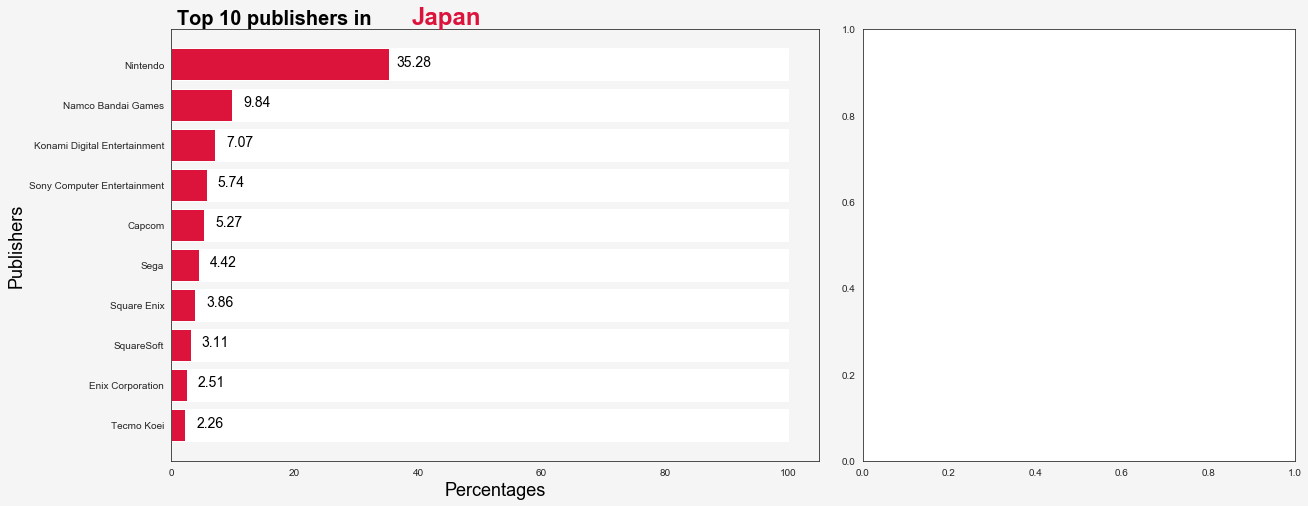

In [74]:
top_10_group_pub_jp = group_pub_jp.head(10)
top_10_group_pub_jp.sort_values(by='Percentages', inplace=True)
top_10_group_pub_jp['Total'] = 100

fig = plt.figure(facecolor='whitesmoke')
sns.set_style('white')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 

axes1.barh(width=top_10_group_pub_jp['Total'], y=top_10_group_pub_jp['Publisher'], color='white')
axes1.barh(width=top_10_group_pub_jp['Percentages'], y=top_10_group_pub_jp['Publisher'], color='crimson')
axes1.text(1, 10, 'Top 10 publishers in', color='black', fontsize=20, fontweight='bold')
axes1.text(39, 10, 'Japan', color='crimson', fontsize=24, fontweight='bold')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Percentages', fontsize=18, color='black')
axes1.set_ylabel('Publishers', fontsize=18, color='black')

for p in axes1.patches[10:]:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes1.annotate('{:.2f}'.format(width), (4+ width, y + height*0.45), ha='center', fontsize=14, color='black')

axes1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'And so we observe that situation', color='black', fontsize=14)
axes2.text(0.55, 0.8, 'in Japan', color='crimson', fontsize=14)
axes2.text(0, 0.75, 'is different, but Nintendo also on the first place.', color='crimson', fontsize=14)
axes2.text(0, 0.7, 'About 2nd and 3rd place:', color='crimson', fontsize=14)     
axes2.text(0, 0.65, 'Namco Bandai Games', color='crimson', fontsize=14)
axes2.text(0.37, 0.65, '- Japanese multinational video game', color='black', fontsize=14)
axes2.text(0, 0.6, 'publisher headquartered in Minato-ku, Tokyo. Bandai Namco', color='black', fontsize=14)
axes2.text(0, 0.55, 'Entertainment was formed on 31 March 2006.', color='black', fontsize=14)
axes2.text(0, 0.5, 'Konami Digital Entertainment', color='crimson', fontsize=14)
axes2.text(0.5, 0.5, '- Japanese entertainment,', color='black', fontsize=14)
axes2.text(0, 0.45, 'video game, and gambling conglomerate.', color='black', fontsize=14)
axes2.text(0.69, 0.45, 'The company', color='black', fontsize=14)
axes2.text(0, 0.4, 'originated in 1969 as a jukebox rental and repair business', color='black', fontsize=14)
axes2.text(0, 0.35, 'in Toyonaka, Osaka, Japan, by Kagemasa Kōzuki.', color='black', fontsize=14)
fig.show()

TypeError: unhashable type: 'list'

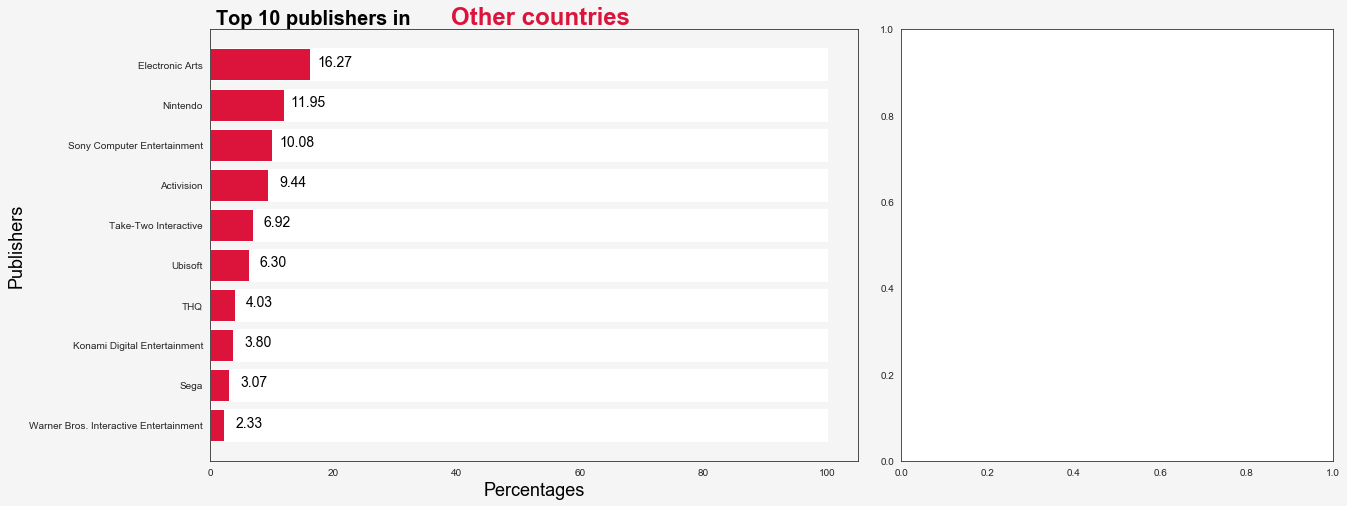

In [75]:
top_10_group_pub_other = group_pub_other.head(10)
top_10_group_pub_other.sort_values(by='Percentages', inplace=True)
top_10_group_pub_other['Total'] = 100

fig = plt.figure(facecolor='whitesmoke')
sns.set_style('white')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 

axes1.barh(width=top_10_group_pub_other['Total'], y=top_10_group_pub_other['Publisher'], color='white')
axes1.barh(width=top_10_group_pub_other['Percentages'], y=top_10_group_pub_other['Publisher'], color='crimson')
axes1.text(1, 10, 'Top 10 publishers in', color='black', fontsize=20, fontweight='bold')
axes1.text(39, 10, 'Other countries', color='crimson', fontsize=24, fontweight='bold')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Percentages', fontsize=18, color='black')
axes1.set_ylabel('Publishers', fontsize=18, color='black')

for p in axes1.patches[10:]:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes1.annotate('{:.2f}'.format(width), (4+ width, y + height*0.45), ha='center', fontsize=14, color='black')

axes1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'We can see that', color='black', fontsize=14)
axes2.text(0.28, 0.8, 'Electronic Arts on the first place,', color='crimson', fontsize=14)
axes2.text(0.82, 0.8, 'and', color='black', fontsize=14)
axes2.text(0, 0.75, 'Sony Computer Entertainment in top 3.', color='crimson', fontsize=14)
axes2.text(0, 0.7, 'Sony Computer Entertainment', color='crimson', fontsize=14)
axes2.text(0.51, 0.7, '- multinational video game and', color='black', fontsize=14)
axes2.text(0, 0.65, 'digital entertainment company wholly owned by Japanese', color='black', fontsize=14)
axes2.text(0, 0.6, 'conglomerate Sony Group Corporation, based in Minato, Tokyo.', color='black', fontsize=14)
fig.show()

TypeError: unhashable type: 'list'

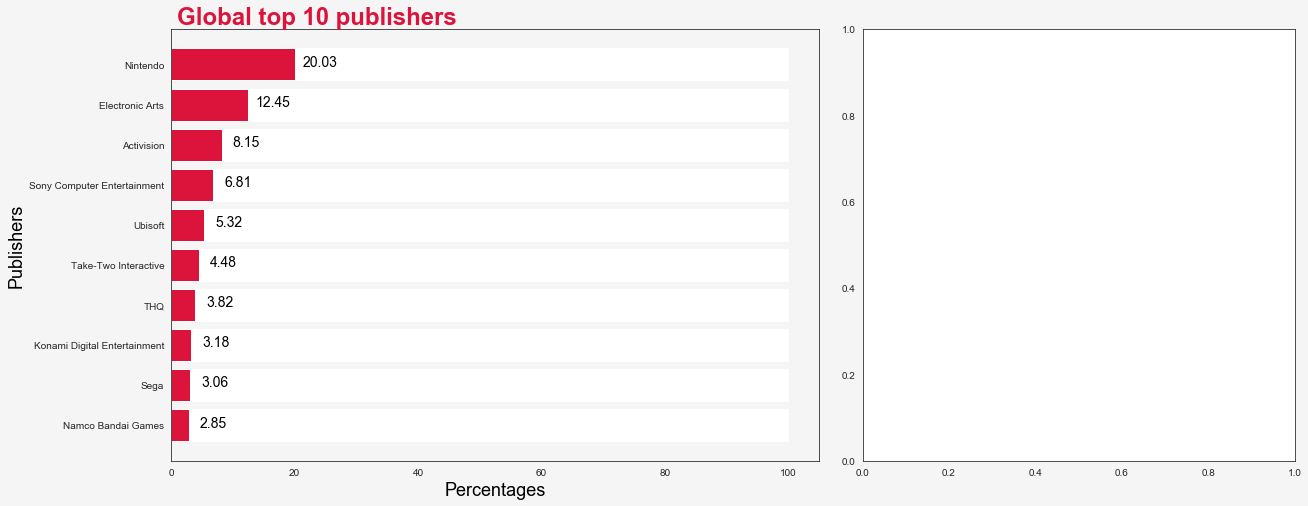

In [76]:
top_10_group_pub_global = group_pub_global.head(10)
top_10_group_pub_global.sort_values(by='Percentages', inplace=True)
top_10_group_pub_global['Total'] = 100

fig = plt.figure(facecolor='whitesmoke')
axes1 = fig.add_axes([0, 0, 1.5, 1.5])
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 

axes1.barh(width=top_10_group_pub_global['Total'], y=top_10_group_pub_global['Publisher'], color='white')
axes1.barh(width=top_10_group_pub_global['Percentages'], y=top_10_group_pub_global['Publisher'], color='crimson')
axes1.text(1, 10, 'Global top 10 publishers', color='crimson', fontsize=24, fontweight='bold')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Percentages', fontsize=18, color='black')
axes1.set_ylabel('Publishers', fontsize=18, color='black')

for p in axes1.patches[10:]:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes1.annotate('{:.2f}'.format(width), (4+ width, y + height*0.45), ha='center', fontsize=14, color='black')

axes1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'On this chart we observe almost', color='black', fontsize=14)
axes2.text(0.54, 0.8, 'identical situation as', color='crimson', fontsize=14)
axes2.text(0, 0.75, 'in North America.', color='crimson', fontsize=14)
axes2.text(0.3, 0.75, 'But:', color='black', fontsize=14)
axes2.text(0, 0.7, '8th place: Microsoft Game Studios => Konami Digital Entertainment', color='black', fontsize=14)
axes2.text(0, 0.65, '10th place: Atari => Namco Bandai Games.', color='black', fontsize=14)
fig.show()

In [77]:
# NA
group_genre_na = df.groupby('Genre')['NA_Sales'].sum().reset_index()
group_genre_na['NA_Sales'] = round(group_genre_na['NA_Sales'],2)
group_genre_na['Percentages'] = group_genre_na['NA_Sales']/sum(group_genre_na['NA_Sales'])*100
group_genre_na['Percentages'] = round(group_genre_na['Percentages'],2)
group_genre_na.sort_values(by='Percentages', ascending=False, inplace=True)
group_genre_na.reset_index(inplace=True)
group_genre_na.drop('index', axis=1, inplace=True)

# EU
group_genre_eu = df.groupby('Genre')['EU_Sales'].sum().reset_index()
group_genre_eu['EU_Sales'] = round(group_genre_eu['EU_Sales'],2)
group_genre_eu['Percentages'] = group_genre_eu['EU_Sales']/sum(group_genre_eu['EU_Sales'])*100
group_genre_eu['Percentages'] = round(group_genre_eu['Percentages'],2)
group_genre_eu.sort_values(by='Percentages', ascending=False, inplace=True)
group_genre_eu.reset_index(inplace=True)
group_genre_eu.drop('index', axis=1, inplace=True)

# JP
group_genre_jp = df.groupby('Genre')['JP_Sales'].sum().reset_index()
group_genre_jp['JP_Sales'] = round(group_genre_jp['JP_Sales'],2)
group_genre_jp['Percentages'] = group_genre_jp['JP_Sales']/sum(group_genre_jp['JP_Sales'])*100
group_genre_jp['Percentages'] = round(group_genre_jp['Percentages'],2)
group_genre_jp.sort_values(by='Percentages', ascending=False, inplace=True)
group_genre_jp.reset_index(inplace=True)
group_genre_jp.drop('index', axis=1, inplace=True)

# Other
group_genre_other = df.groupby('Genre')['Other_Sales'].sum().reset_index()
group_genre_other['Other_Sales'] = round(group_genre_other['Other_Sales'],2)
group_genre_other['Percentages'] = group_genre_other['Other_Sales']/sum(group_genre_other['Other_Sales'])*100
group_genre_other['Percentages'] = round(group_genre_other['Percentages'],2)
group_genre_other.sort_values(by='Percentages', ascending=False, inplace=True)
group_genre_other.reset_index(inplace=True)
group_genre_other.drop('index', axis=1, inplace=True)

# Global
group_genre_global = df.groupby('Genre')['Global_Sales'].sum().reset_index()
group_genre_global['Global_Sales'] = round(group_genre_global['Global_Sales'],2)
group_genre_global['Percentages'] = group_genre_global['Global_Sales']/sum(group_genre_global['Global_Sales'])*100
group_genre_global['Percentages'] = round(group_genre_global['Percentages'],2)
group_genre_global.sort_values(by='Percentages', ascending=False, inplace=True)
group_genre_global.reset_index(inplace=True)
group_genre_global.drop('index', axis=1, inplace=True)

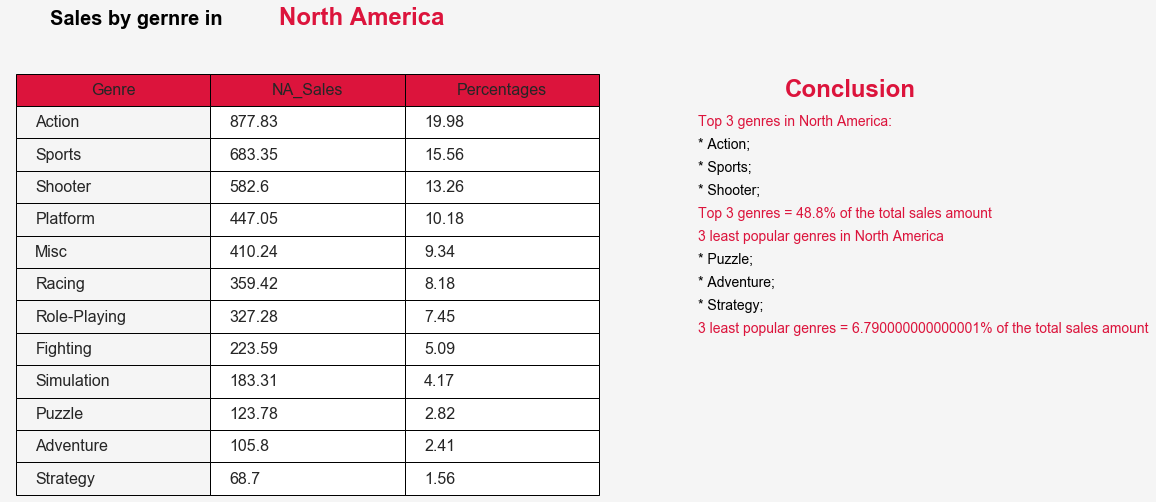

In [78]:
list_na=[]
for n in range(len(group_genre_na['Genre'])):
    x = group_genre_na.loc[n,:]
    list_na.append(x)
color_list=[['whitesmoke', 'white', 'white']]
fig = plt.figure(facecolor='whitesmoke')
axes1 = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([1.6, 0, 1, 1]) 

axes1.set_axis_off() 
table=axes1.table(cellColours=color_list*12,cellText = list_na, cellLoc ='left', loc ='upper left', colWidths=[0.3,0.3,0.3],
                  colLabels=group_genre_na.columns,colColours=['crimson']*3)           
table.auto_set_font_size(False) 
table.set_fontsize(16)  
table.scale(1.5, 2.7) 
axes1.text(0.1, 1.15, 'Sales by gernre in', color='black', fontsize=20, fontweight='bold')
axes1.text(0.63, 1.15, 'North America', color='crimson', fontsize=24, fontweight='bold')

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'Top 3 genres in North America:', color='crimson', fontsize=14)
axes2.text(0, 0.72, f"* {group_genre_na['Genre'][0]};", color='black', fontsize=14)
axes2.text(0, 0.64, f"* {group_genre_na['Genre'][1]};", color='black', fontsize=14)
axes2.text(0, 0.56, f"* {group_genre_na['Genre'][2]};", color='black', fontsize=14)
axes2.text(0, 0.48, f"Top 3 genres = {sum(group_genre_na['Percentages'][:3])}% of the total sales amount", color='crimson', fontsize=14)
axes2.text(0, 0.4, '3 least popular genres in North America', color='crimson', fontsize=14)
axes2.text(0, 0.32, f"* {group_genre_na['Genre'][9]};", color='black', fontsize=14)
axes2.text(0, 0.24, f"* {group_genre_na['Genre'][10]};", color='black', fontsize=14)
axes2.text(0, 0.16, f"* {group_genre_na['Genre'][11]};", color='black', fontsize=14)
axes2.text(0, 0.08, f"3 least popular genres = {sum(group_genre_na['Percentages'][9:])}% of the total sales amount", color='crimson', fontsize=14)

fig.show()

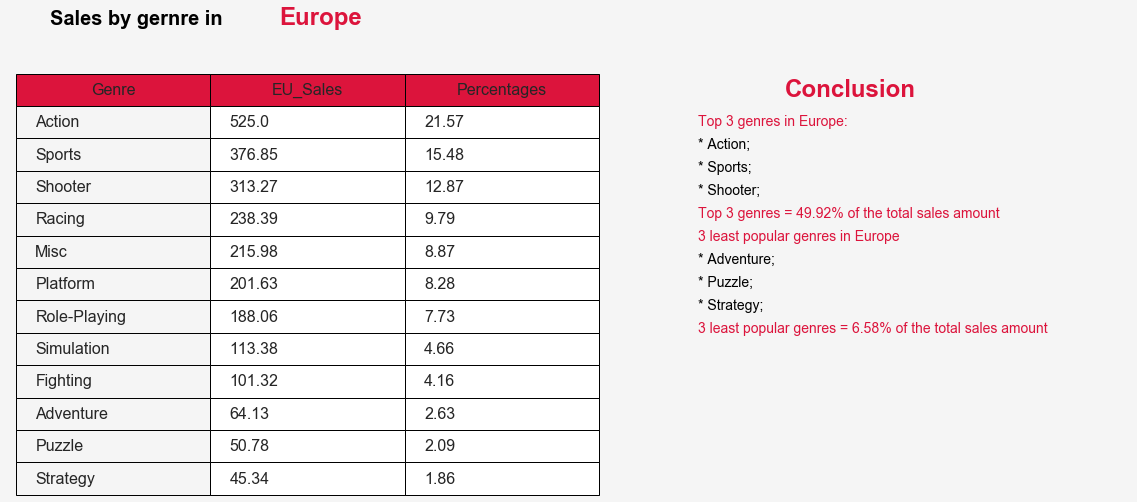

In [79]:
list_eu=[]
for n in range(len(group_genre_eu['Genre'])):
    x = group_genre_eu.loc[n,:]
    list_eu.append(x)
color_list=[['whitesmoke', 'white', 'white']]
fig = plt.figure(facecolor='whitesmoke')
axes1 = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([1.6, 0, 1, 1]) 

axes1.set_axis_off() 
table=axes1.table(cellColours=color_list*12,cellText = list_eu, cellLoc ='left', loc ='upper left', colWidths=[0.3,0.3,0.3],
                  colLabels=group_genre_eu.columns,colColours=['crimson']*3)      
table.auto_set_font_size(False) 
table.set_fontsize(16)  
table.scale(1.5, 2.7) 
axes1.text(0.1, 1.15, 'Sales by gernre in', color='black', fontsize=20, fontweight='bold')
axes1.text(0.63, 1.15, 'Europe', color='crimson', fontsize=24, fontweight='bold')

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'Top 3 genres in Europe:', color='crimson', fontsize=14)
axes2.text(0, 0.72, f"* {group_genre_eu['Genre'][0]};", color='black', fontsize=14)
axes2.text(0, 0.64, f"* {group_genre_eu['Genre'][1]};", color='black', fontsize=14)
axes2.text(0, 0.56, f"* {group_genre_eu['Genre'][2]};", color='black', fontsize=14)
axes2.text(0, 0.48, f"Top 3 genres = {round(sum(group_genre_eu['Percentages'][:3]),2)}% of the total sales amount", color='crimson', fontsize=14)
axes2.text(0, 0.4, '3 least popular genres in Europe', color='crimson', fontsize=14)
axes2.text(0, 0.32, f"* {group_genre_eu['Genre'][9]};", color='black', fontsize=14)
axes2.text(0, 0.24, f"* {group_genre_eu['Genre'][10]};", color='black', fontsize=14)
axes2.text(0, 0.16, f"* {group_genre_eu['Genre'][11]};", color='black', fontsize=14)
axes2.text(0, 0.08, f"3 least popular genres = {sum(group_genre_eu['Percentages'][9:])}% of the total sales amount", color='crimson', fontsize=14)

fig.show()

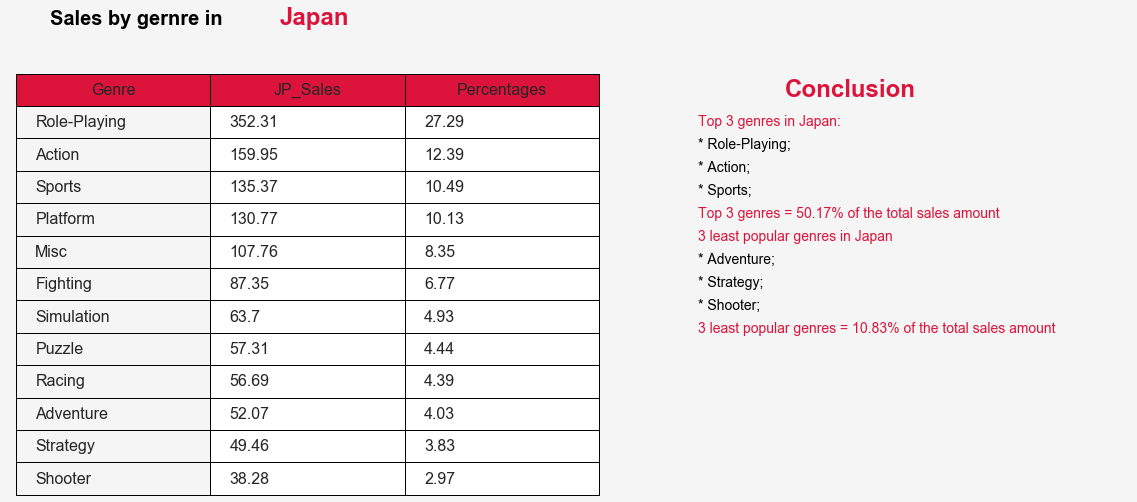

In [80]:
list_jp=[]
for n in range(len(group_genre_jp['Genre'])):
    x = group_genre_jp.loc[n,:]
    list_jp.append(x)
color_list=[['whitesmoke', 'white', 'white']]
fig = plt.figure(facecolor='whitesmoke')
axes1 = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([1.6, 0, 1, 1]) 

axes1.set_axis_off() 
table=axes1.table(cellColours=color_list*12,cellText = list_jp, cellLoc ='left', loc ='upper left', colWidths=[0.3,0.3,0.3],
                  colLabels=group_genre_jp.columns,colColours=['crimson']*3)      
table.auto_set_font_size(False) 
table.set_fontsize(16)  
table.scale(1.5, 2.7) 
axes1.text(0.1, 1.15, 'Sales by gernre in', color='black', fontsize=20, fontweight='bold')
axes1.text(0.63, 1.15, 'Japan', color='crimson', fontsize=24, fontweight='bold')

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'Top 3 genres in Japan:', color='crimson', fontsize=14)
axes2.text(0, 0.72, f"* {group_genre_jp['Genre'][0]};", color='black', fontsize=14)
axes2.text(0, 0.64, f"* {group_genre_jp['Genre'][1]};", color='black', fontsize=14)
axes2.text(0, 0.56, f"* {group_genre_jp['Genre'][2]};", color='black', fontsize=14)
axes2.text(0, 0.48, f"Top 3 genres = {round(sum(group_genre_jp['Percentages'][:3]),2)}% of the total sales amount", color='crimson', fontsize=14)
axes2.text(0, 0.4, '3 least popular genres in Japan', color='crimson', fontsize=14)
axes2.text(0, 0.32, f"* {group_genre_jp['Genre'][9]};", color='black', fontsize=14)
axes2.text(0, 0.24, f"* {group_genre_jp['Genre'][10]};", color='black', fontsize=14)
axes2.text(0, 0.16, f"* {group_genre_jp['Genre'][11]};", color='black', fontsize=14)
axes2.text(0, 0.08, f"3 least popular genres = {sum(group_genre_jp['Percentages'][9:])}% of the total sales amount", color='crimson', fontsize=14)

fig.show()

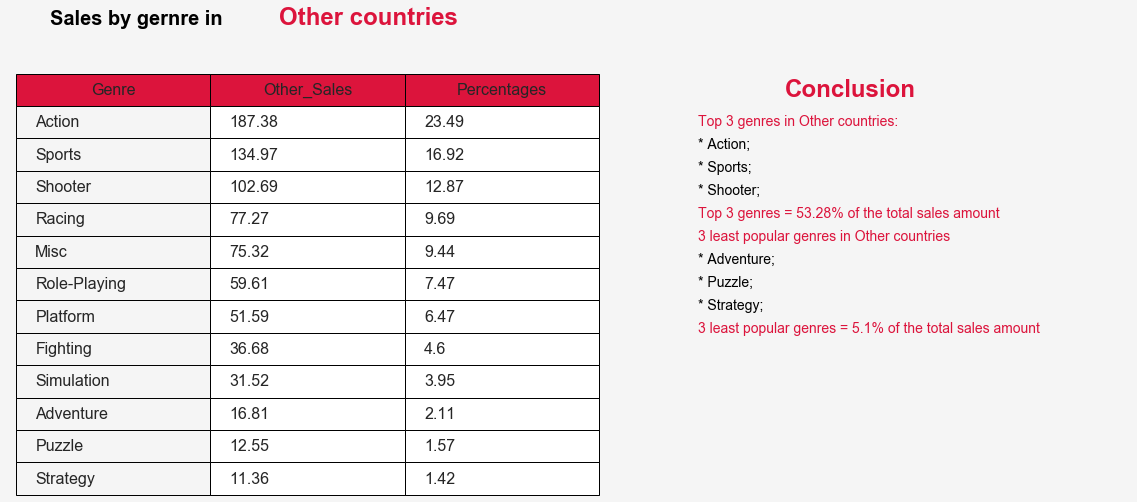

In [81]:
list_other=[]
for n in range(len(group_genre_other['Genre'])):
    x = group_genre_other.loc[n,:]
    list_other.append(x)
color_list=[['whitesmoke', 'white', 'white']]
fig = plt.figure(facecolor='whitesmoke')
axes1 = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([1.6, 0, 1, 1]) 

axes1.set_axis_off() 
table=axes1.table(cellColours=color_list*12,cellText = list_other, cellLoc ='left', loc ='upper left', colWidths=[0.3,0.3,0.3],
                  colLabels=group_genre_other.columns,colColours=['crimson']*3)      
table.auto_set_font_size(False) 
table.set_fontsize(16)  
table.scale(1.5, 2.7) 
axes1.text(0.1, 1.15, 'Sales by gernre in', color='black', fontsize=20, fontweight='bold')
axes1.text(0.63, 1.15, 'Other countries', color='crimson', fontsize=24, fontweight='bold')

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.8, 'Top 3 genres in Other countries:', color='crimson', fontsize=14)
axes2.text(0, 0.72, f"* {group_genre_other['Genre'][0]};", color='black', fontsize=14)
axes2.text(0, 0.64, f"* {group_genre_other['Genre'][1]};", color='black', fontsize=14)
axes2.text(0, 0.56, f"* {group_genre_other['Genre'][2]};", color='black', fontsize=14)
axes2.text(0, 0.48, f"Top 3 genres = {round(sum(group_genre_other['Percentages'][:3]),2)}% of the total sales amount", color='crimson', fontsize=14)
axes2.text(0, 0.4, '3 least popular genres in Other countries', color='crimson', fontsize=14)
axes2.text(0, 0.32, f"* {group_genre_other['Genre'][9]};", color='black', fontsize=14)
axes2.text(0, 0.24, f"* {group_genre_other['Genre'][10]};", color='black', fontsize=14)
axes2.text(0, 0.16, f"* {group_genre_other['Genre'][11]};", color='black', fontsize=14)
axes2.text(0, 0.08, f"3 least popular genres = {sum(group_genre_other['Percentages'][9:])}% of the total sales amount", color='crimson', fontsize=14)

fig.show()

In [82]:
# NA
group_platform_na = df.groupby('Platform')['NA_Sales'].sum().reset_index()
group_platform_na.sort_values(by='NA_Sales', ascending=False, inplace=True)
group_platform_na_top_10 = group_platform_na.head(10).reset_index()
group_platform_na_top_10.drop('index', inplace=True, axis=1)

# EU
group_platform_eu = df.groupby('Platform')['EU_Sales'].sum().reset_index()
group_platform_eu.sort_values(by='EU_Sales', ascending=False, inplace=True)
group_platform_eu_top_10 = group_platform_eu.head(10).reset_index()
group_platform_eu_top_10.drop('index', inplace=True, axis=1)

# JP
group_platform_jp = df.groupby('Platform')['JP_Sales'].sum().reset_index()
group_platform_jp.sort_values(by='JP_Sales', ascending=False, inplace=True)
group_platform_jp_top_10 = group_platform_jp.head(10).reset_index()
group_platform_jp_top_10.drop('index', inplace=True, axis=1)

# Other
group_platform_other = df.groupby('Platform')['Other_Sales'].sum().reset_index()
group_platform_other.sort_values(by='Other_Sales', ascending=False, inplace=True)
group_platform_other_top_10 = group_platform_other.head(10).reset_index()
group_platform_other_top_10.drop('index', inplace=True, axis=1)

# Global
group_platform_global = df.groupby('Platform')['Global_Sales'].sum().reset_index()
group_platform_global.sort_values(by='Global_Sales', ascending=False, inplace=True)
group_platform_global_top_10 = group_platform_global.head(10).reset_index()
group_platform_global_top_10.drop('index', inplace=True, axis=1)

TypeError: unhashable type: 'list'

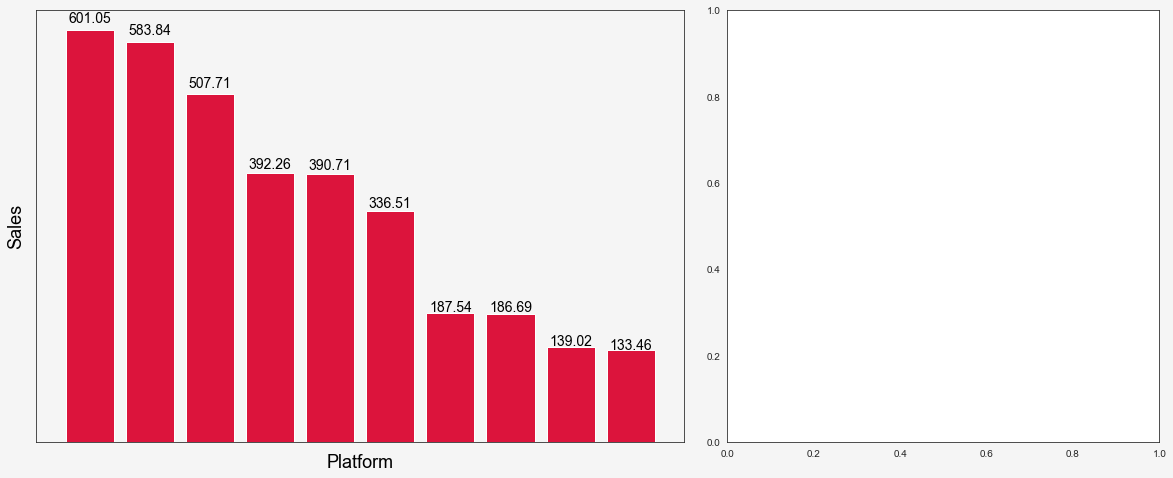

In [83]:
fig = plt.figure(facecolor='whitesmoke')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) # chart line
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) # conclusion

height_list = []
axes1.bar(height=group_platform_na_top_10['NA_Sales'], x=group_platform_na_top_10['Platform'], color='crimson')
for p in axes1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    height_list.append(height)
    axes1.annotate('{:.2f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=14, color='black')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Platform', fontsize=18, color='black')
axes1.set_ylabel('Sales', fontsize=18, color='black')
axes1.set_xticklabels([])
axes1.set_yticklabels([])
axes1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes1.text(2, 600, 'Top 10 platforms in', color='black', fontsize=20, fontweight='bold')
axes1.text(5.75, 600, 'North America', color='crimson', fontsize=24, fontweight='bold')

axes1.text(-0.23, height_list[0]/2, group_platform_na_top_10['Platform'][0], color='black', fontsize=14)
axes1.text(0.85, height_list[1]/2, group_platform_na_top_10['Platform'][1], color='black', fontsize=14)
axes1.text(1.85, height_list[2]/2, group_platform_na_top_10['Platform'][2], color='black', fontsize=14)
axes1.text(2.85, height_list[3]/2, group_platform_na_top_10['Platform'][3], color='black', fontsize=14)
axes1.text(3.85, height_list[4]/2, group_platform_na_top_10['Platform'][4], color='black', fontsize=14)
axes1.text(4.85, height_list[5]/2, group_platform_na_top_10['Platform'][5], color='black', fontsize=14)
axes1.text(5.85, height_list[6]/2, group_platform_na_top_10['Platform'][6], color='black', fontsize=14)
axes1.text(6.85, height_list[7]/2, group_platform_na_top_10['Platform'][7], color='black', fontsize=14)
axes1.text(7.85, height_list[8]/2, group_platform_na_top_10['Platform'][8], color='black', fontsize=14)
axes1.text(8.85, height_list[9]/2, group_platform_na_top_10['Platform'][9], color='black', fontsize=14)

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.85, 'Top 3 platforms in North America:', color='crimson', fontsize=14)
axes2.text(0, 0.8, f"* {group_platform_na_top_10['Platform'][0]};", color='black', fontsize=14)
axes2.text(0, 0.75, f"* {group_platform_na_top_10['Platform'][1]};", color='black', fontsize=14)
axes2.text(0, 0.7, f"* {group_platform_na_top_10['Platform'][2]}.", color='black', fontsize=14)
axes2.text(0, 0.65, f"Average number of sales of top 10 platforms in NA - {round(statistics.mean(group_platform_na_top_10['NA_Sales']),2)}.", color='crimson', fontsize=14)
axes2.text(0, 0.6, f"Top 10 platforms = {round(sum(group_platform_na_top_10['NA_Sales'])/sum(group_platform_na['NA_Sales'])*100,2)}% of the total sales in NA.", color='crimson', fontsize=14)
fig.show()

In [ ]:
fig = plt.figure(facecolor='whitesmoke')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) # chart line
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) # conclusion

height_list = []
axes1.bar(height=group_platform_eu_top_10['EU_Sales'], x=group_platform_eu_top_10['Platform'], color='crimson')
for p in axes1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    height_list.append(height)
    axes1.annotate('{:.2f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=14, color='black')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Platform', fontsize=18, color='black')
axes1.set_ylabel('Sales', fontsize=18, color='black')
axes1.set_xticklabels([])
axes1.set_yticklabels([])
axes1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes1.text(2, 350, 'Top 10 platforms in', color='black', fontsize=20, fontweight='bold')
axes1.text(5.75, 350, 'Europe', color='crimson', fontsize=24, fontweight='bold')

axes1.text(-0.23, height_list[0]/2, group_platform_eu_top_10['Platform'][0], color='black', fontsize=14)
axes1.text(0.85, height_list[1]/2, group_platform_eu_top_10['Platform'][1], color='black', fontsize=14)
axes1.text(1.78, height_list[2]/2, group_platform_eu_top_10['Platform'][2], color='black', fontsize=14)
axes1.text(2.85, height_list[3]/2, group_platform_eu_top_10['Platform'][3], color='black', fontsize=14)
axes1.text(3.85, height_list[4]/2, group_platform_eu_top_10['Platform'][4], color='black', fontsize=14)
axes1.text(4.85, height_list[5]/2, group_platform_eu_top_10['Platform'][5], color='black', fontsize=14)
axes1.text(5.85, height_list[6]/2, group_platform_eu_top_10['Platform'][6], color='black', fontsize=14)
axes1.text(6.85, height_list[7]/2, group_platform_eu_top_10['Platform'][7], color='black', fontsize=14)
axes1.text(7.85, height_list[8]/2, group_platform_eu_top_10['Platform'][8], color='black', fontsize=14)
axes1.text(8.85, height_list[9]/2, group_platform_eu_top_10['Platform'][9], color='black', fontsize=14)

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.85, 'Top 3 platforms in Europe:', color='crimson', fontsize=14)
axes2.text(0, 0.8, f"* {group_platform_eu_top_10['Platform'][0]};", color='black', fontsize=14)
axes2.text(0, 0.75, f"* {group_platform_eu_top_10['Platform'][1]};", color='black', fontsize=14)
axes2.text(0, 0.7, f"* {group_platform_eu_top_10['Platform'][2]}.", color='black', fontsize=14)
axes2.text(0, 0.65, f"Average number of sales of top 10 platforms in EU - {round(statistics.mean(group_platform_eu_top_10['EU_Sales']),2)}.", color='crimson', fontsize=14)
axes2.text(0, 0.6, f"Top 10 platforms = {round(sum(group_platform_eu_top_10['EU_Sales'])/sum(group_platform_eu['EU_Sales'])*100,2)}% of the total sales in EU.", color='crimson', fontsize=14)
fig.show()

In [ ]:
fig = plt.figure(facecolor='whitesmoke')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 

height_list = []
axes1.bar(height=group_platform_jp_top_10['JP_Sales'], x=group_platform_jp_top_10['Platform'], color='crimson')
for p in axes1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    height_list.append(height)
    axes1.annotate('{:.2f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=14, color='black')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Platform', fontsize=18, color='black')
axes1.set_ylabel('Sales', fontsize=18, color='black')
axes1.set_xticklabels([])
axes1.set_yticklabels([])
axes1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes1.text(2, 180, 'Top 10 platforms in', color='black', fontsize=20, fontweight='bold')
axes1.text(5.75, 180, 'Japan', color='crimson', fontsize=24, fontweight='bold')

axes1.text(-0.23, height_list[0]/2, group_platform_jp_top_10['Platform'][0], color='black', fontsize=14)
axes1.text(0.85, height_list[1]/2, group_platform_jp_top_10['Platform'][1], color='black', fontsize=14)
axes1.text(1.85, height_list[2]/2, group_platform_jp_top_10['Platform'][2], color='black', fontsize=14)
axes1.text(2.77, height_list[3]/2, group_platform_jp_top_10['Platform'][3], color='black', fontsize=14)
axes1.text(3.85, height_list[4]/2, group_platform_jp_top_10['Platform'][4], color='black', fontsize=14)
axes1.text(4.85, height_list[5]/2, group_platform_jp_top_10['Platform'][5], color='black', fontsize=14)
axes1.text(5.85, height_list[6]/2, group_platform_jp_top_10['Platform'][6], color='black', fontsize=14)
axes1.text(6.85, height_list[7]/2, group_platform_jp_top_10['Platform'][7], color='black', fontsize=14)
axes1.text(7.85, height_list[8]/2, group_platform_jp_top_10['Platform'][8], color='black', fontsize=14)
axes1.text(8.85, height_list[9]/2, group_platform_jp_top_10['Platform'][9], color='black', fontsize=14)

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.85, 'Top 3 platforms in Japan:', color='crimson', fontsize=14)
axes2.text(0, 0.8, f"* {group_platform_jp_top_10['Platform'][0]};", color='black', fontsize=14)
axes2.text(0, 0.75, f"* {group_platform_jp_top_10['Platform'][1]};", color='black', fontsize=14)
axes2.text(0, 0.7, f"* {group_platform_jp_top_10['Platform'][2]}.", color='black', fontsize=14)
axes2.text(0, 0.65, f"Average number of sales of top 10 platforms in JP - {round(statistics.mean(group_platform_jp_top_10['JP_Sales']),2)}.", color='crimson', fontsize=14)
axes2.text(0, 0.6, f"Top 10 platforms = {round(sum(group_platform_jp_top_10['JP_Sales'])/sum(group_platform_jp['JP_Sales'])*100,2)}% of the total sales in JP.", color='crimson', fontsize=14)
fig.show()

In [ ]:
fig = plt.figure(facecolor='whitesmoke')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 

height_list = []
axes1.bar(height=group_platform_other_top_10['Other_Sales'], x=group_platform_other_top_10['Platform'], color='crimson')
for p in axes1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    height_list.append(height)
    axes1.annotate('{:.2f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=14, color='black')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Platform', fontsize=18, color='black')
axes1.set_ylabel('Sales', fontsize=18, color='black')
axes1.set_xticklabels([])
axes1.set_yticklabels([])
axes1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes1.text(2, 195, 'Top 10 platforms in', color='black', fontsize=20, fontweight='bold')
axes1.text(5.75, 195, 'Other countries', color='crimson', fontsize=24, fontweight='bold')

axes1.text(-0.23, height_list[0]/2, group_platform_other_top_10['Platform'][0], color='black', fontsize=14)
axes1.text(0.85, height_list[1]/2, group_platform_other_top_10['Platform'][1], color='black', fontsize=14)
axes1.text(1.78, height_list[2]/2, group_platform_other_top_10['Platform'][2], color='black', fontsize=14)
axes1.text(2.77, height_list[3]/2, group_platform_other_top_10['Platform'][3], color='black', fontsize=14)
axes1.text(3.85, height_list[4]/2, group_platform_other_top_10['Platform'][4], color='black', fontsize=14)
axes1.text(4.85, height_list[5]/2, group_platform_other_top_10['Platform'][5], color='black', fontsize=14)
axes1.text(5.85, height_list[6]/2, group_platform_other_top_10['Platform'][6], color='black', fontsize=14)
axes1.text(6.85, height_list[7]/2, group_platform_other_top_10['Platform'][7], color='black', fontsize=14)
axes1.text(7.85, height_list[8]/2, group_platform_other_top_10['Platform'][8], color='black', fontsize=14)
axes1.text(8.85, height_list[9]/2, group_platform_other_top_10['Platform'][9], color='black', fontsize=14)

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.85, 'Top 3 platforms in Other countries:', color='crimson', fontsize=14)
axes2.text(0, 0.8, f"* {group_platform_other_top_10['Platform'][0]};", color='black', fontsize=14)
axes2.text(0, 0.75, f"* {group_platform_other_top_10['Platform'][1]};", color='black', fontsize=14)
axes2.text(0, 0.7, f"* {group_platform_other_top_10['Platform'][2]}.", color='black', fontsize=14)
axes2.text(0, 0.65, f"Average number of sales of top 10 platforms in Other - {round(statistics.mean(group_platform_other_top_10['Other_Sales']),2)}.", color='crimson', fontsize=14)
axes2.text(0, 0.6, f"Top 10 platforms = {round(sum(group_platform_other_top_10['Other_Sales'])/sum(group_platform_other['Other_Sales'])*100,2)}% of the total sales in Other.", color='crimson', fontsize=14)
fig.show()

TypeError: unhashable type: 'list'

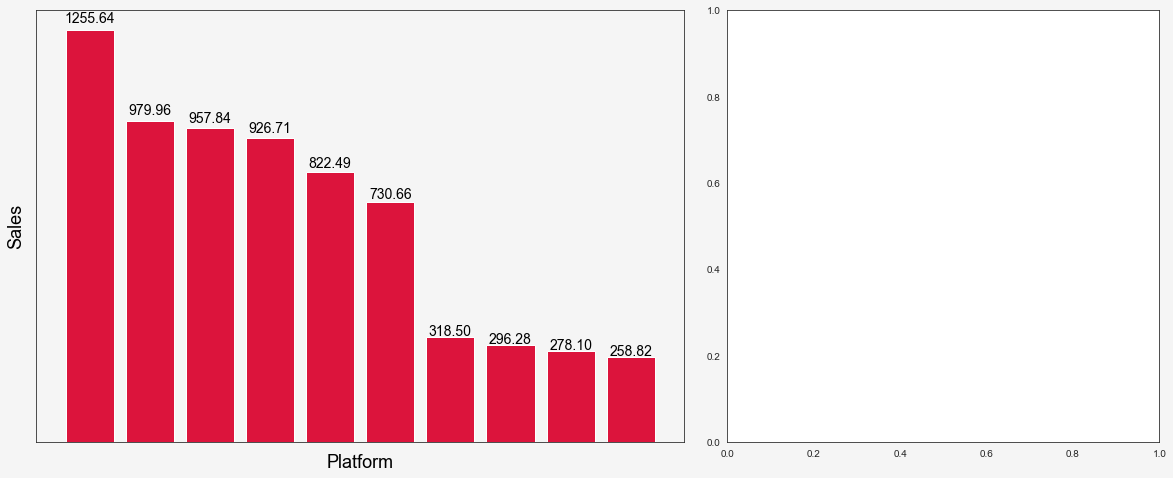

In [84]:
fig = plt.figure(facecolor='whitesmoke')
axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 
axes2 = fig.add_axes([1.6, 0, 1, 1.5]) 

height_list = []
axes1.bar(height=group_platform_global_top_10['Global_Sales'], x=group_platform_global_top_10['Platform'], color='crimson')
for p in axes1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    height_list.append(height)
    axes1.annotate('{:.2f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=14, color='black')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Platform', fontsize=18, color='black')
axes1.set_ylabel('Sales', fontsize=18, color='black')
axes1.set_xticklabels([])
axes1.set_yticklabels([])
axes1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes1.text(2, 1240, 'Global top 10 platforms', color='crimson', fontsize=24, fontweight='bold')

axes1.text(-0.23, height_list[0]/2, group_platform_global_top_10['Platform'][0], color='black', fontsize=14)
axes1.text(0.75, height_list[1]/2, group_platform_global_top_10['Platform'][1], color='black', fontsize=14)
axes1.text(1.78, height_list[2]/2, group_platform_global_top_10['Platform'][2], color='black', fontsize=14)
axes1.text(2.77, height_list[3]/2, group_platform_global_top_10['Platform'][3], color='black', fontsize=14)
axes1.text(3.85, height_list[4]/2, group_platform_global_top_10['Platform'][4], color='black', fontsize=14)
axes1.text(4.85, height_list[5]/2, group_platform_global_top_10['Platform'][5], color='black', fontsize=14)
axes1.text(5.85, height_list[6]/2, group_platform_global_top_10['Platform'][6], color='black', fontsize=14)
axes1.text(6.85, height_list[7]/2, group_platform_global_top_10['Platform'][7], color='black', fontsize=14)
axes1.text(7.85, height_list[8]/2, group_platform_global_top_10['Platform'][8], color='black', fontsize=14)
axes1.text(8.85, height_list[9]/2, group_platform_global_top_10['Platform'][9], color='black', fontsize=14)

axes2.set_facecolor('whitesmoke')
axes2.axis('off')
axes2.text(0.2, 0.9, 'Conclusion', color='crimson', fontsize=24, fontweight='bold')
axes2.text(0, 0.85, 'Top 3 platforms:', color='crimson', fontsize=14)
axes2.text(0, 0.8, f"* {group_platform_global_top_10['Platform'][0]};", color='black', fontsize=14)
axes2.text(0, 0.75, f"* {group_platform_global_top_10['Platform'][1]};", color='black', fontsize=14)
axes2.text(0, 0.7, f"* {group_platform_global_top_10['Platform'][2]}.", color='black', fontsize=14)
axes2.text(0, 0.65, f"Average number of sales of top 10 platforms - {round(statistics.mean(group_platform_global_top_10['Global_Sales']),2)}.", color='crimson', fontsize=14)
axes2.text(0, 0.6, f"Top 10 platforms = {round(sum(group_platform_global_top_10['Global_Sales'])/sum(group_platform_global['Global_Sales'])*100,2)}% of the total sales.", color='crimson', fontsize=14)
fig.show()